In [1]:

import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(16,9)})

# import geopandas as gpd

In [6]:
foldername = "C:\\Users\\20193308\\Desktop\\Data Expl\\Jan_2010_Oct_2021"

regions_full = ["avon-and-somerset", "bedfordshire", "btp", "cambridgeshire", "cheshire", "city-of-london", "cleveland", "cumbria", "derbyshire", "devon-and-cornwall", "dorset", "durham", "dyfed-powys", "essex", "gloucestershire", "gwent", "hampshire", "hertfordshire", "humberside", "kent", "lancashire", "leicestershire", "lincolnshire", "merseyside", "metropolitan", "norfolk", "northamptonshire", "northern-ireland", "northumbria", "north-wales", "north-yorkshire", "nottinghamshire", "south-wales", "south-yorkshire", "staffordshire", "suffolk", "surrey", "sussex", "thames-valley", "warwickshire", "west-mercia", "west-midlands", "west-yorkshire", "wiltshire"]
print(len(regions_full))
def load_dataset(filename, regions, start_year, start_month, end_year, end_month):
    global foldername
    dfs = []
    for year in range(start_year, end_year+1):
        for month in range(1 if year != start_year else start_month, 13 if year != end_year-1 else end_month+1):
             for region in regions:
                try:
                    month_str = f"0{month}" if month < 10 else f"{month}"
                    path = f"{foldername}/{year}-{month_str}/{year}-{month_str}-{region}-{filename}.csv"
                    df = pd.read_csv(path)
                    dfs.append(df)
                except FileNotFoundError:
                    print(f"{path} not found")
    return pd.concat(dfs)

44


In [8]:
start_year = 2013
end_year = 2021
#df = load_dataset("street", [regions_full[8]], start_year, 5, end_year,12)

In [ ]:
#bar chart where it is possible to see how many crimes were reported per month in each year based on region
start_year = 2013
end_year = 2021
reg_nr = 8
df = load_dataset("street", [regions_full[reg_nr]], start_year, 5, end_year,12)
for year in range(start_year, end_year+1):
    df_b = df[df['Month'].str[0:4] == str(year)]
    df_bar = df_b.groupby(["Month"]).size()
    fig, ax = plt.subplots(figsize=(10,5))
    ax_bar = df_bar.plot.bar(x='Month', rot=0, ax=ax);
    ax_bar.set_title('Total number of crimes in ' + str(year) +' '+ str(regions_full[reg_nr]));


In [ ]:
#box plot for each of the region to check outliers
for x in range(44):
    df = load_dataset("street", [regions_full[x]], start_year, 5, end_year,12)
    
    
    df_b= df.groupby(["Month"]).size()
    df_size = pd.DataFrame(data=df_b)
    df_final = df_size.rename(columns={df_size.columns[0]: 'Number'})
    df_final['Month'] = df_final.index

    year = []
    for row in df_final['Month']:
        year.append(row[0:4])

    df_final['Year'] = year
    
    bx_plot = df_final.boxplot(by='Year', column = "Number")
    bx_plot.set_title('Total number of crimes yeach year in '+ str(regions_full[x]) +' reg index: ' + str(x));
  


Analysis:
- btp no street files found 2016-02 - 2016-10 and 2017-01
- west-midlands no street files found 2021-04 - 2021-10


In [20]:
# Analysing data where there are more than 1 department that reported crimes
departments =[]
for x in range(44):
    df = load_dataset("street", [regions_full[x]], start_year, 5, end_year,12)
    if len(df['Reported by'].unique())>1:
        departments.append(x)
        

C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-avon-and-somerset-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-avon-and-somerset-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-bedfordshire-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-bedfordshire-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2016-02/2016-02-btp-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2016-03/2016-03-btp-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2016-04/2016-04-btp-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2016-05/2016-05-btp-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2016-06/2016-06-btp-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2016-07/2016-07-btp-street.csv not found
C:\U

C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-suffolk-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-suffolk-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-surrey-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-surrey-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-sussex-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-sussex-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-thames-valley-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-thames-valley-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-warwickshire-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-warwickshire-street.csv no

In [22]:
print(departments)

[6, 16, 19, 28, 34, 36, 39, 40]


C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-cleveland-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-cleveland-street.csv not found
Reported by
Avon and Somerset Constabulary      7310
Cleveland Police                  791273
dtype: int64
No Data reported by Avon and Somerset Constabulary deparment in 2013
No Data reported by Avon and Somerset Constabulary deparment in 2014
No Data reported by Avon and Somerset Constabulary deparment in 2016
No Data reported by Avon and Somerset Constabulary deparment in 2017
No Data reported by Avon and Somerset Constabulary deparment in 2018
No Data reported by Avon and Somerset Constabulary deparment in 2019
No Data reported by Avon and Somerset Constabulary deparment in 2020
No Data reported by Avon and Somerset Constabulary deparment in 2021


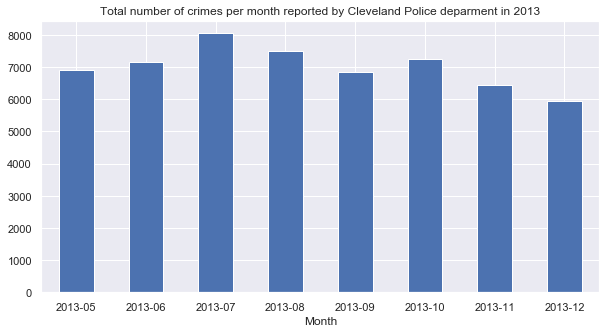

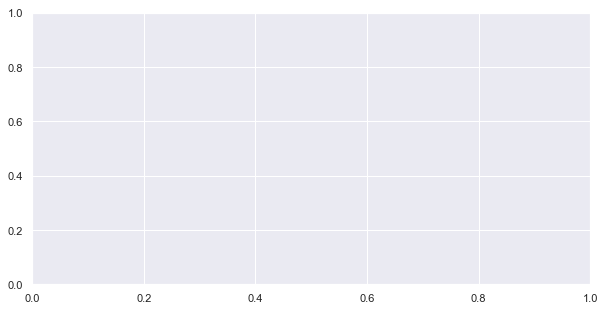

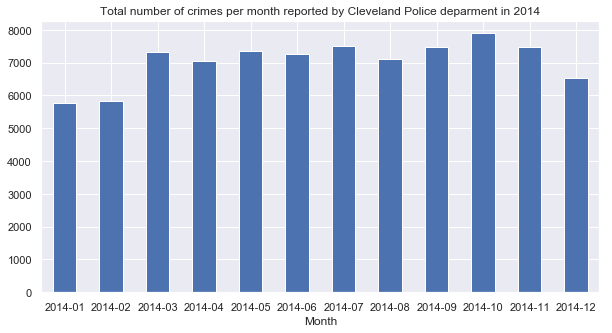

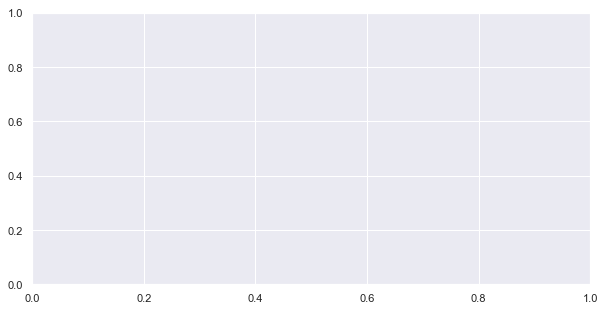

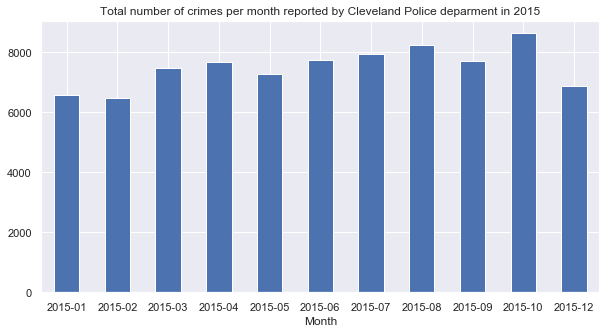

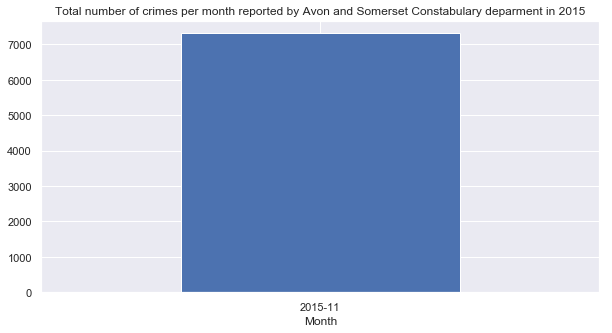

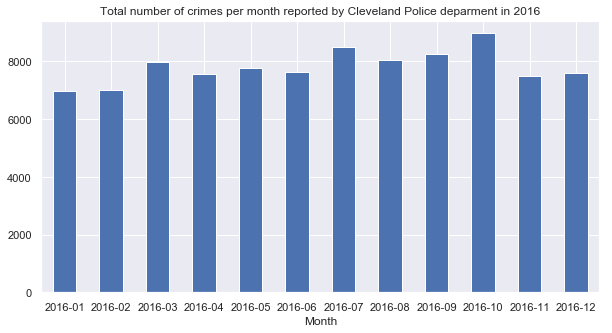

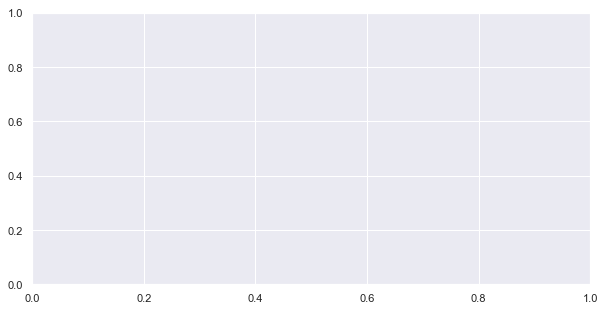

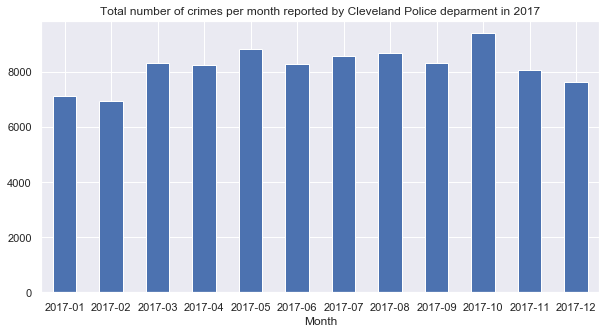

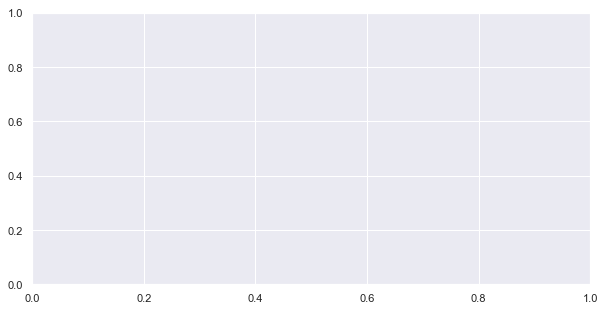

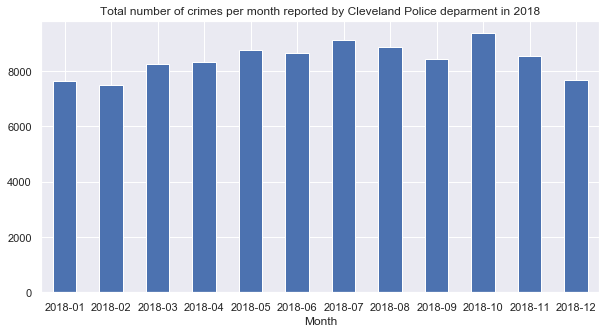

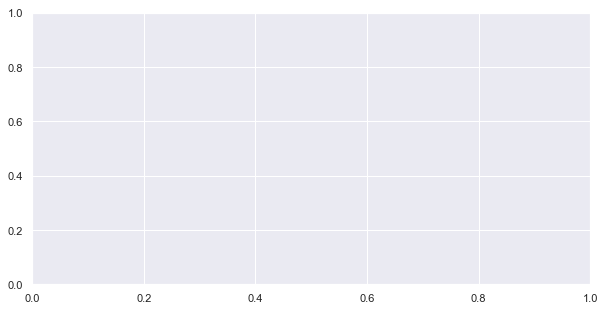

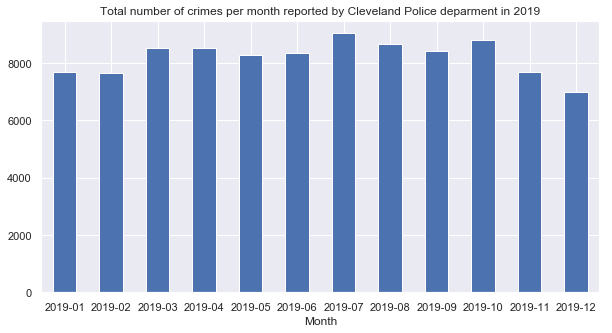

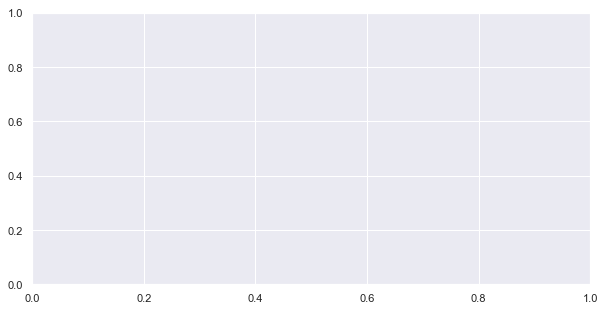

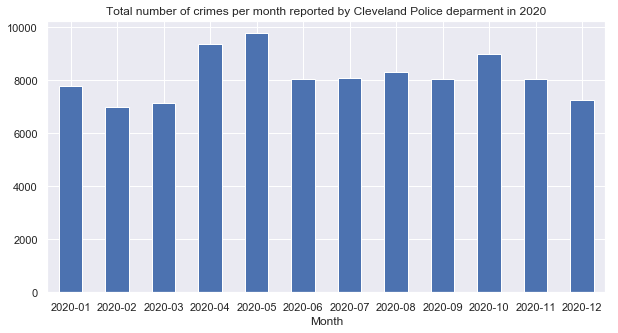

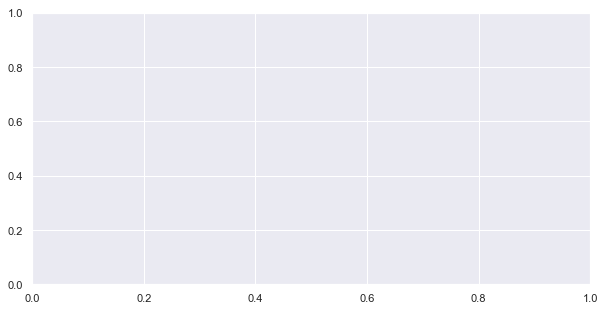

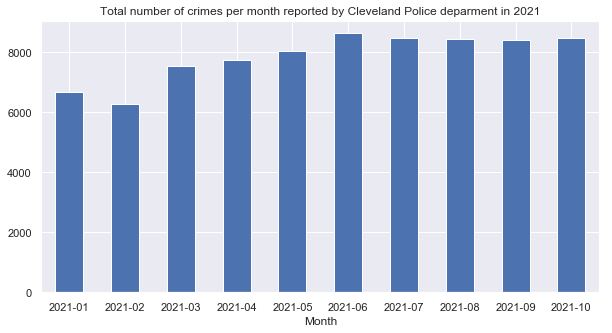

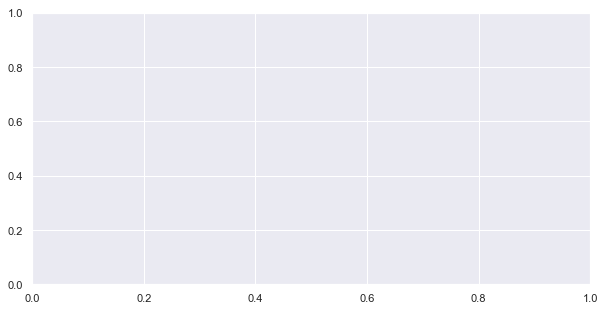

In [23]:
df = load_dataset("street", [regions_full[6]], start_year, 5, end_year,12)
print(df.groupby(["Reported by"]).size())

    
for year in range(start_year, end_year+1):
    departments = df['Reported by'].unique()
    for dep in departments:

            df_b = df[(df['Month'].str[0:4] == str(year)) & (df['Reported by'] == str(dep))]
            df_bar = df_b.groupby(["Month"]).size()
            fig, ax = plt.subplots(figsize=(10,5))
            if df_bar.empty:
                print('No Data reported by ' + str(dep) +' deparment in ' + str(year))
                #df_b = pd.DataFrame({'Month':['No Data'], 'val':[0]}),
                
                #ax_bar = df_b.plot.bar(x='Month', rot=0, ax=ax);
                #ax_bar.set_title('No data ' + str(dep) +' deparment in ' + str(year));

            else:

                ax_bar = df_bar.plot.bar(x='Month', rot=0, ax=ax);
                ax_bar.set_title('Total number of crimes per month reported by ' + str(dep) +' deparment in ' + str(year));
                

C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-hampshire-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-hampshire-street.csv not found
Reported by
Avon and Somerset Constabulary      48203
Hampshire Constabulary            1463777
dtype: int64
No Data reported by Avon and Somerset Constabulary deparment in 2013
No Data reported by Avon and Somerset Constabulary deparment in 2014
No Data reported by Avon and Somerset Constabulary deparment in 2015
No Data reported by Avon and Somerset Constabulary deparment in 2017
No Data reported by Avon and Somerset Constabulary deparment in 2018
No Data reported by Avon and Somerset Constabulary deparment in 2019
No Data reported by Avon and Somerset Constabulary deparment in 2020
No Data reported by Avon and Somerset Constabulary deparment in 2021


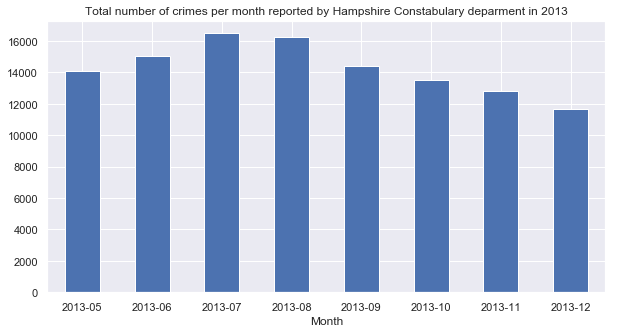

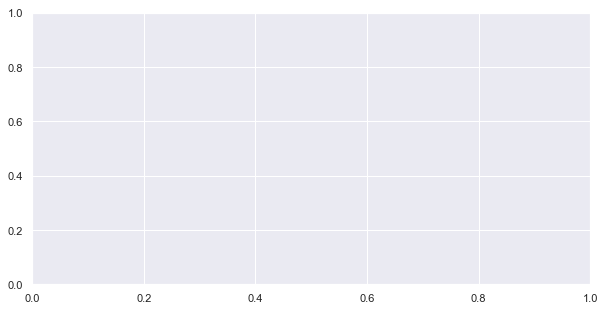

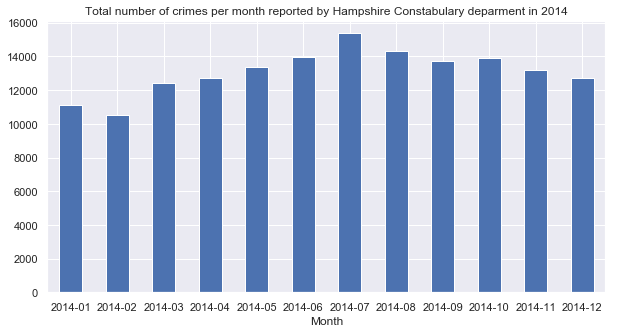

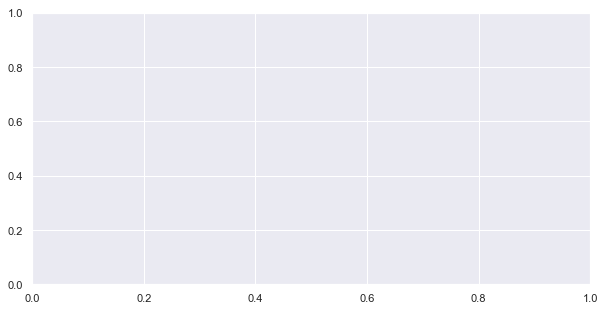

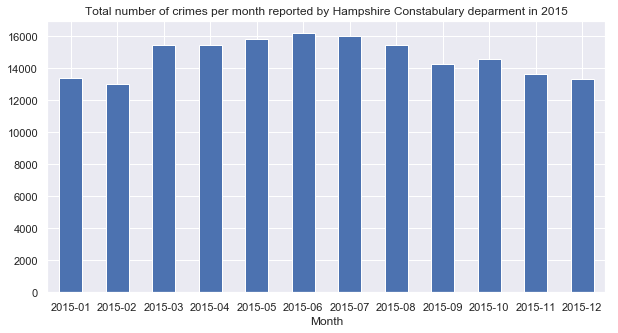

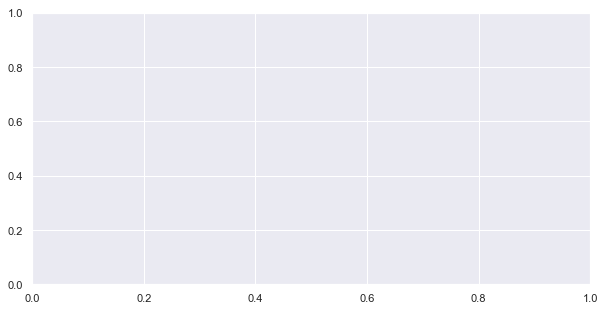

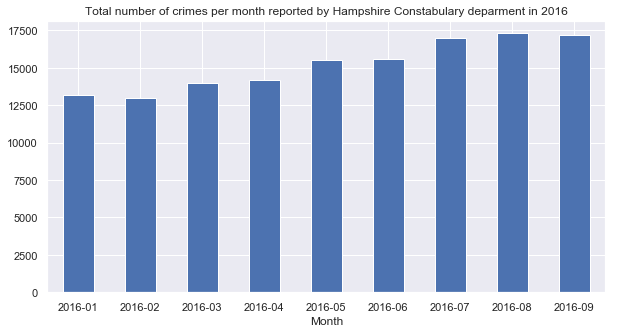

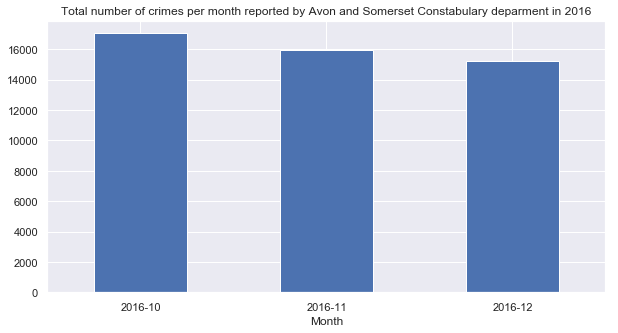

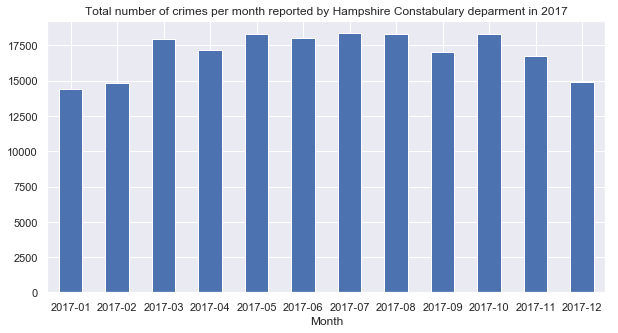

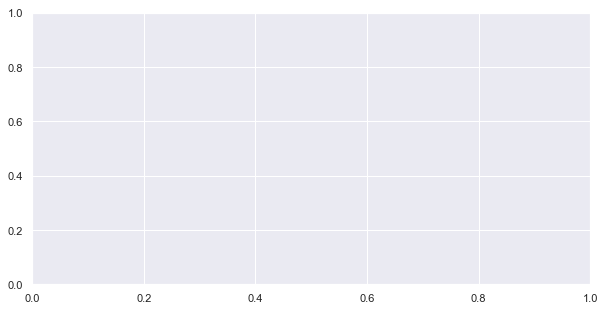

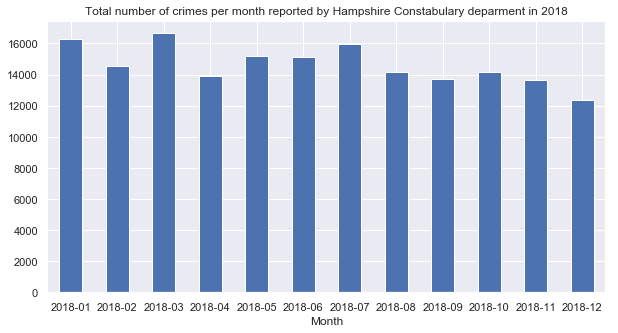

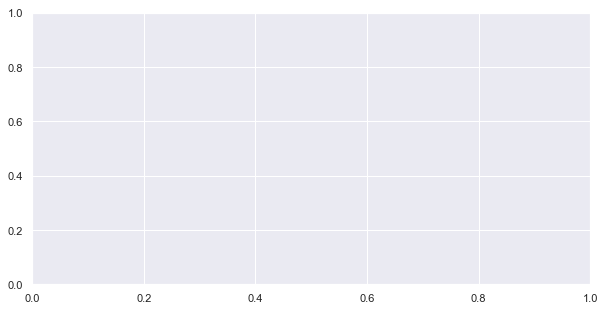

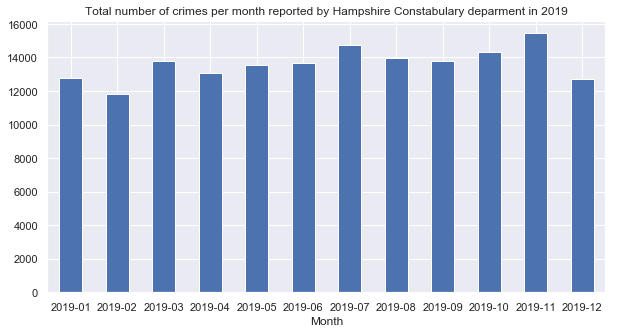

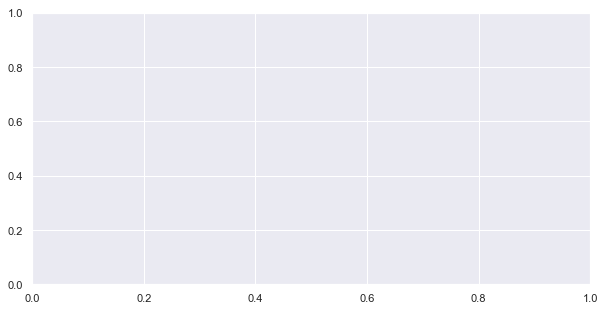

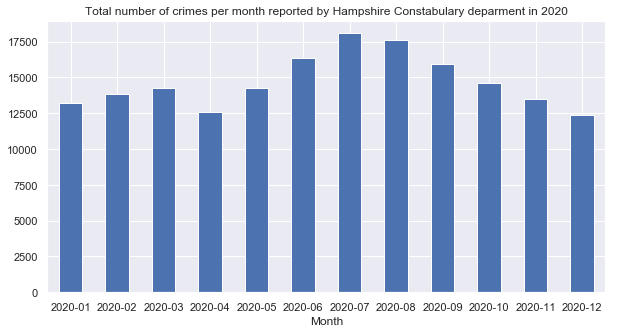

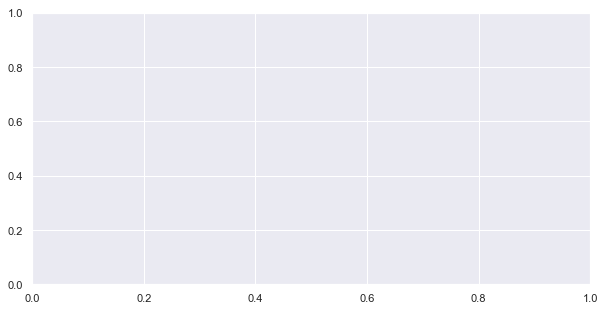

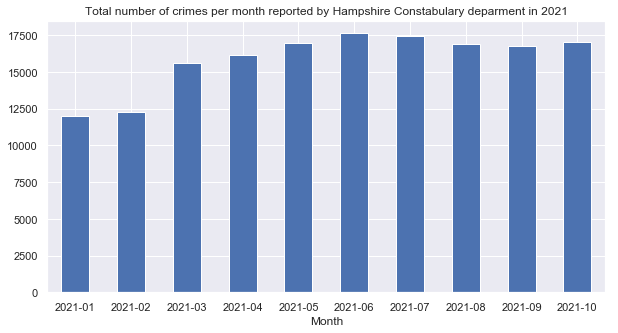

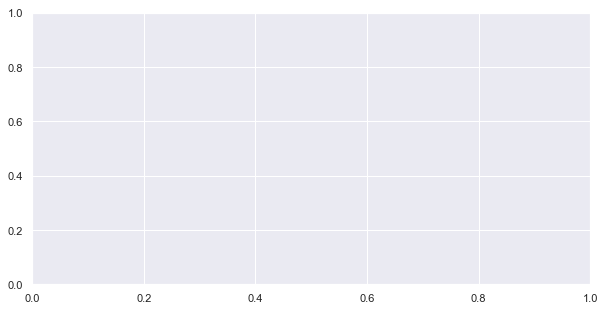

In [24]:
df = load_dataset("street", [regions_full[16]], start_year, 5, end_year,12)
print(df.groupby(["Reported by"]).size())

    
for year in range(start_year, end_year+1):
    departments = df['Reported by'].unique()
    for dep in departments:

            df_b = df[(df['Month'].str[0:4] == str(year)) & (df['Reported by'] == str(dep))]
            df_bar = df_b.groupby(["Month"]).size()
            fig, ax = plt.subplots(figsize=(10,5))
            if df_bar.empty:
                print('No Data reported by ' + str(dep) +' deparment in ' + str(year))
                #df_b = pd.DataFrame({'Month':['No Data'], 'val':[0]}),
                
                #ax_bar = df_b.plot.bar(x='Month', rot=0, ax=ax);
                #ax_bar.set_title('No data ' + str(dep) +' deparment in ' + str(year));

            else:

                ax_bar = df_bar.plot.bar(x='Month', rot=0, ax=ax);
                ax_bar.set_title('Total number of crimes per month reported by ' + str(dep) +' deparment in ' + str(year));
                

C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-kent-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-kent-street.csv not found
Reported by
Avon and Somerset Constabulary      14580
Hampshire Constabulary              28291
Kent Police                       1600906
dtype: int64
No Data reported by Hampshire Constabulary deparment in 2013
No Data reported by Avon and Somerset Constabulary deparment in 2013
No Data reported by Hampshire Constabulary deparment in 2014
No Data reported by Avon and Somerset Constabulary deparment in 2014
No Data reported by Hampshire Constabulary deparment in 2015
No Data reported by Avon and Somerset Constabulary deparment in 2015
No Data reported by Avon and Somerset Constabulary deparment in 2017
No Data reported by Hampshire Constabulary deparment in 2018
No Data reported by Avon and Somerset Constabulary deparment in 2018
No Data reported by Hampshire Constabulary deparment in 2019
No Data

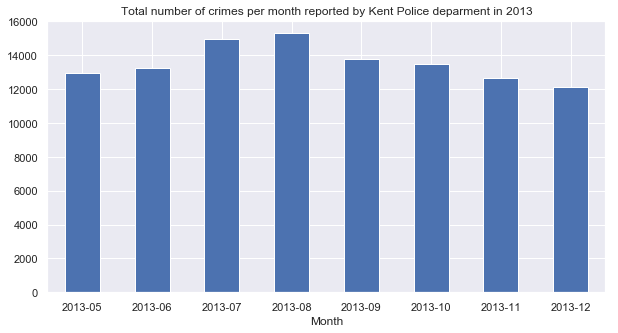

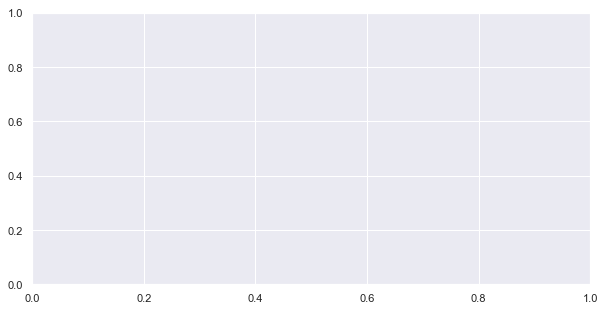

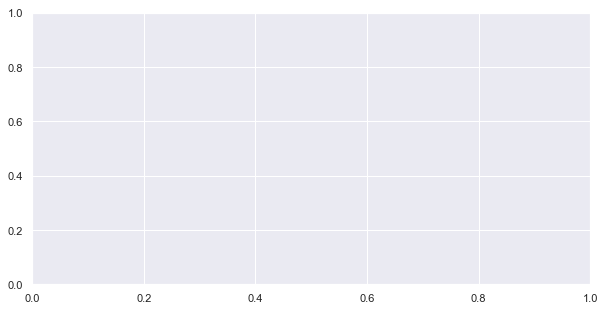

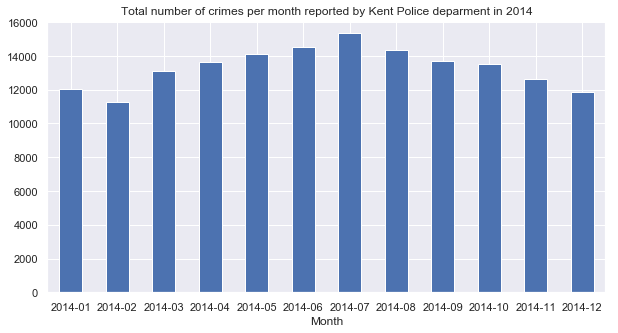

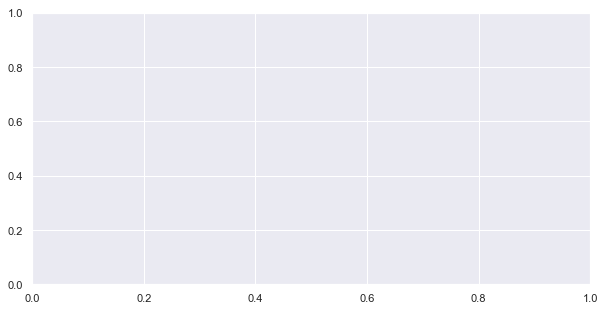

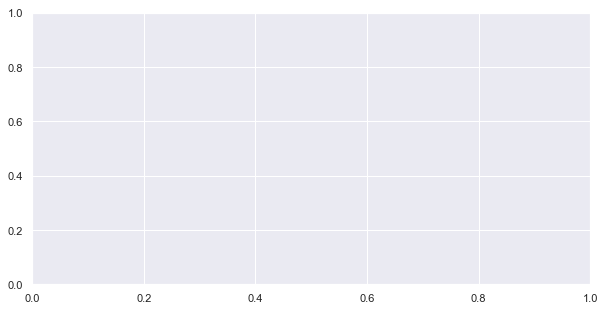

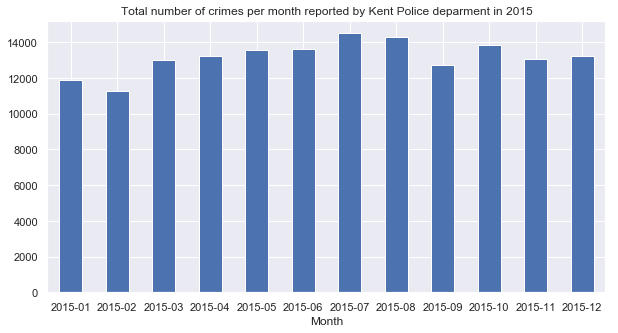

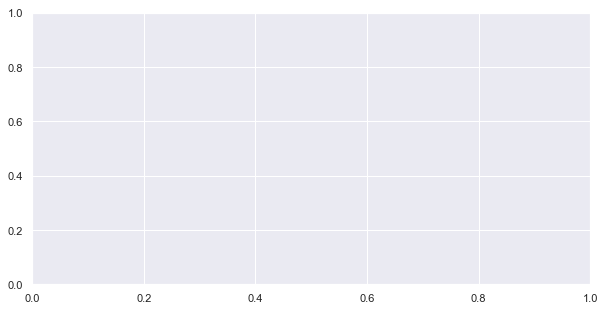

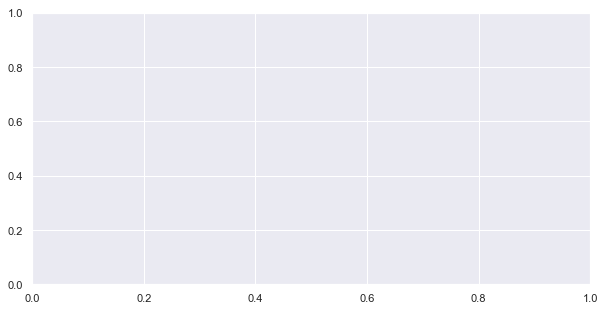

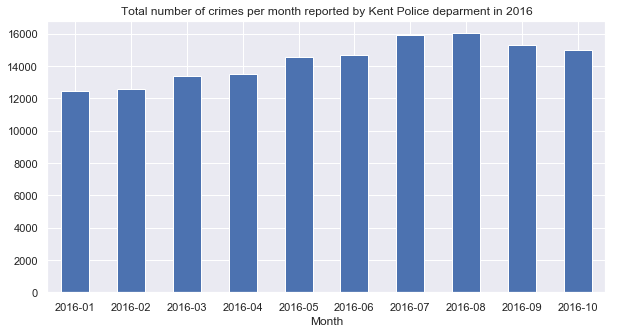

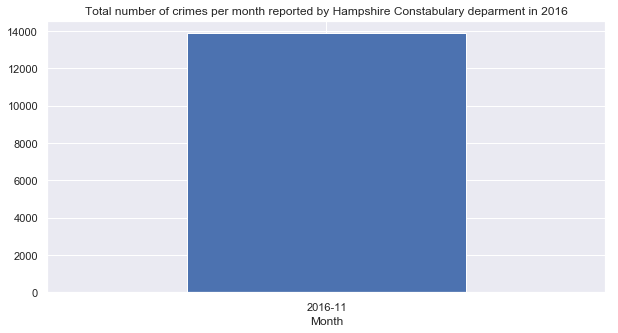

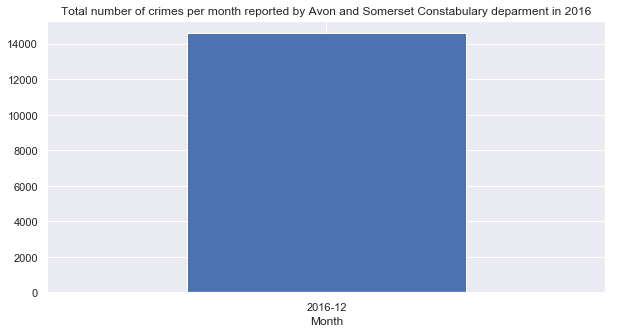

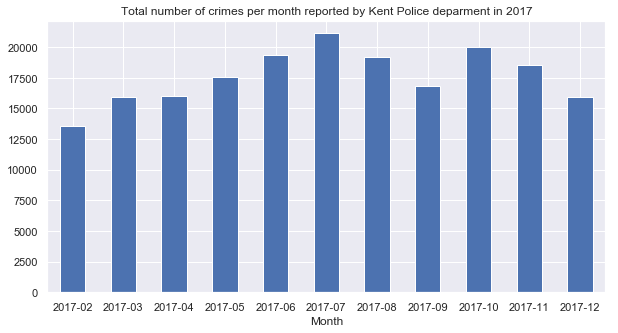

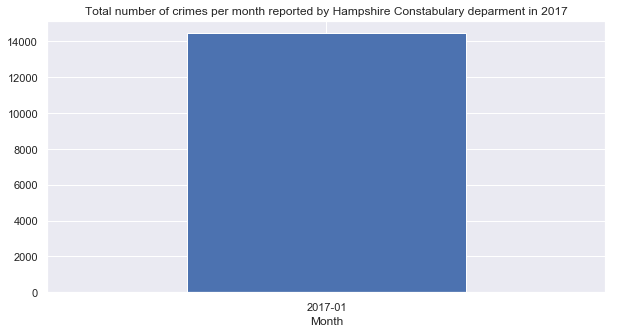

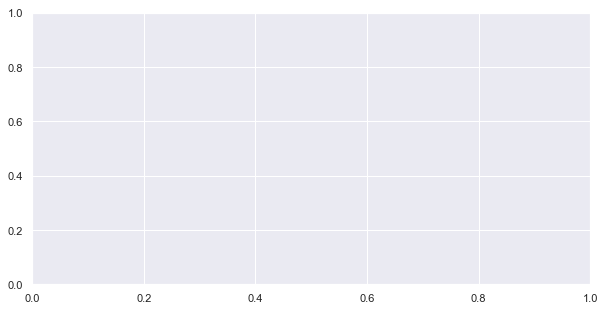

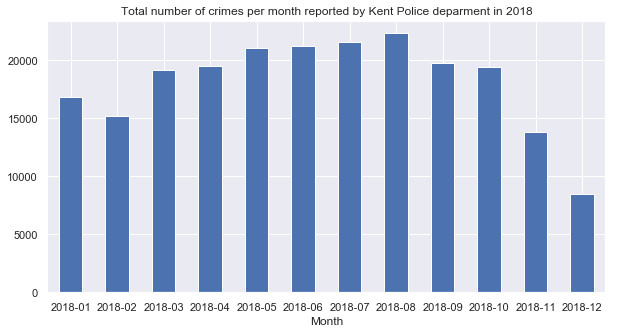

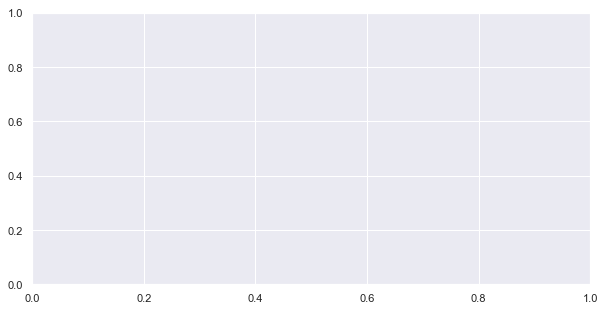

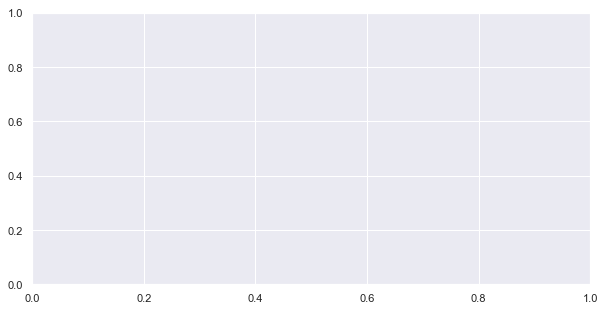

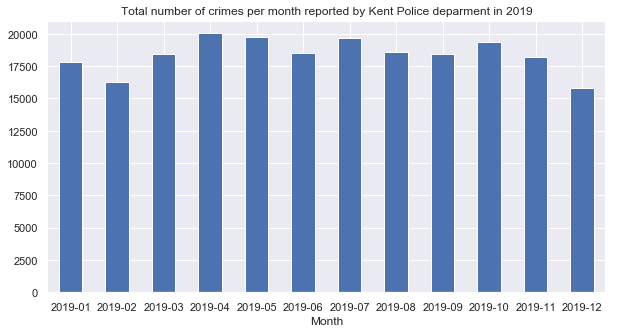

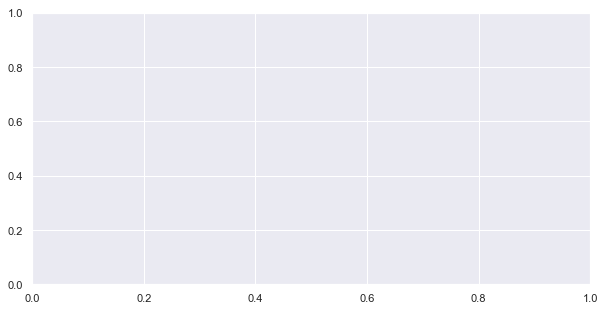

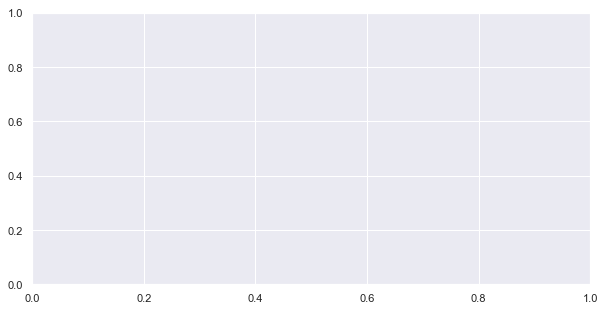

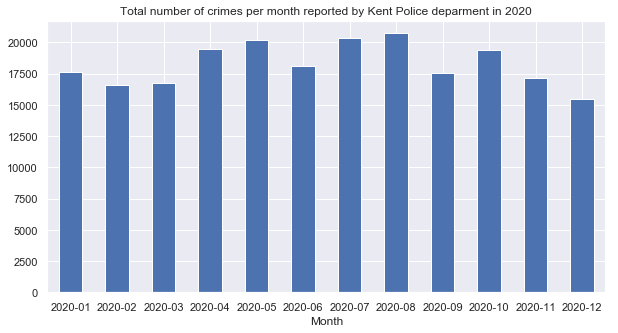

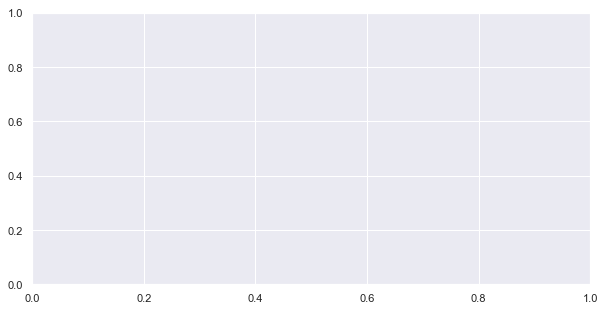

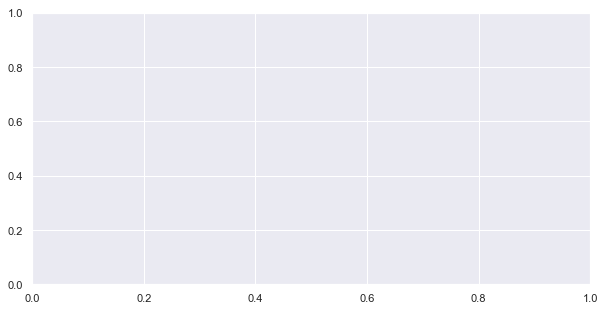

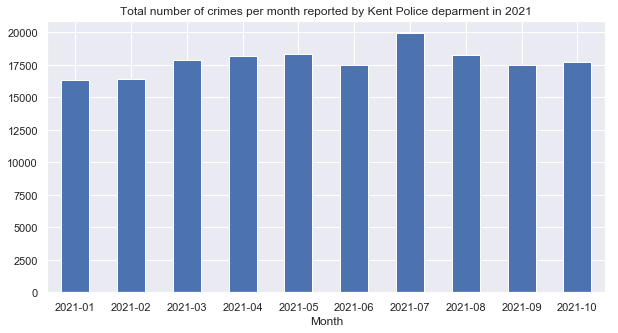

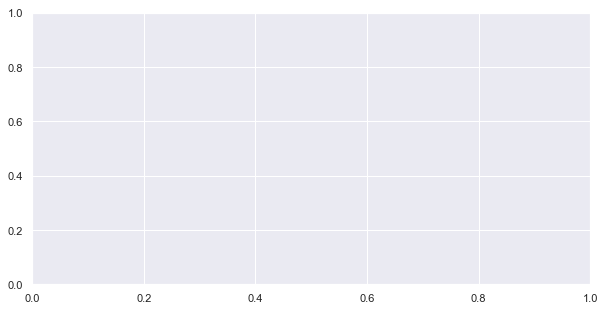

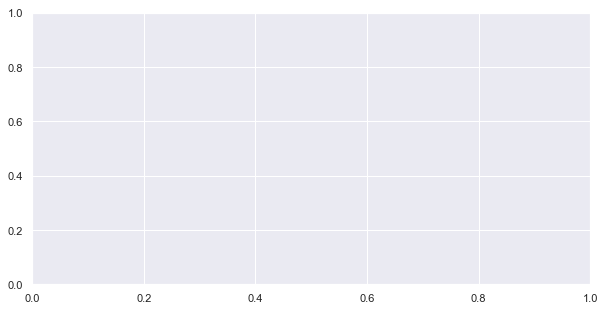

In [25]:
df = load_dataset("street", [regions_full[19]], start_year, 5, end_year,12)
print(df.groupby(["Reported by"]).size())

    
for year in range(start_year, end_year+1):
    departments = df['Reported by'].unique()
    for dep in departments:

            df_b = df[(df['Month'].str[0:4] == str(year)) & (df['Reported by'] == str(dep))]
            df_bar = df_b.groupby(["Month"]).size()
            fig, ax = plt.subplots(figsize=(10,5))
            if df_bar.empty:
                print('No Data reported by ' + str(dep) +' deparment in ' + str(year))
                #df_b = pd.DataFrame({'Month':['No Data'], 'val':[0]}),
                
                #ax_bar = df_b.plot.bar(x='Month', rot=0, ax=ax);
                #ax_bar.set_title('No data ' + str(dep) +' deparment in ' + str(year));

            else:

                ax_bar = df_bar.plot.bar(x='Month', rot=0, ax=ax);
                ax_bar.set_title('Total number of crimes per month reported by ' + str(dep) +' deparment in ' + str(year));
                


C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-northumbria-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-northumbria-street.csv not found
Reported by
Avon and Somerset Constabulary      25974
Northumbria Police                1539779
dtype: int64
No Data reported by Avon and Somerset Constabulary deparment in 2013
No Data reported by Avon and Somerset Constabulary deparment in 2014
No Data reported by Avon and Somerset Constabulary deparment in 2016
No Data reported by Avon and Somerset Constabulary deparment in 2017
No Data reported by Avon and Somerset Constabulary deparment in 2018
No Data reported by Avon and Somerset Constabulary deparment in 2019
No Data reported by Avon and Somerset Constabulary deparment in 2020
No Data reported by Avon and Somerset Constabulary deparment in 2021


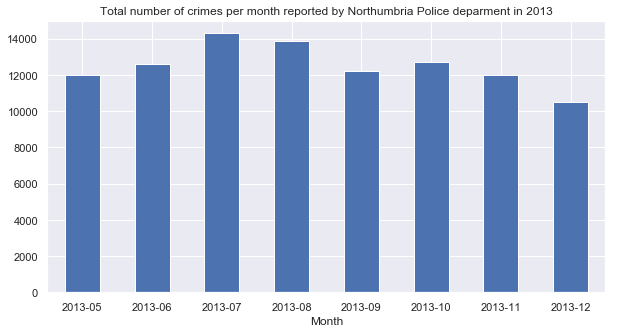

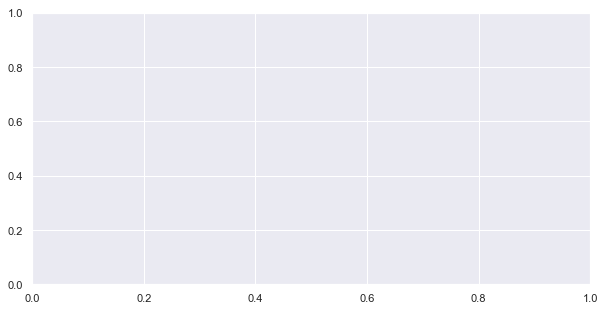

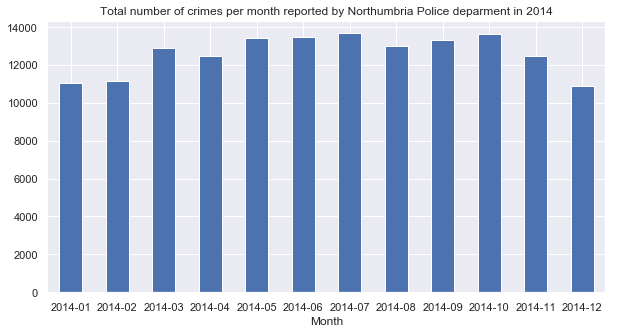

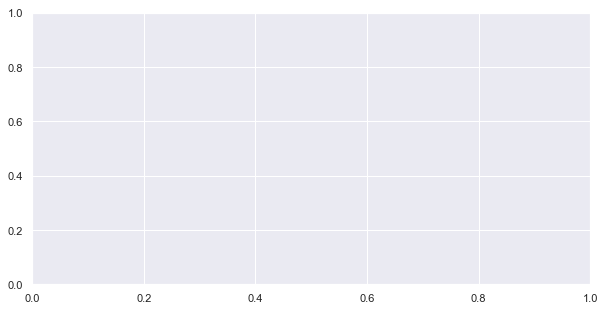

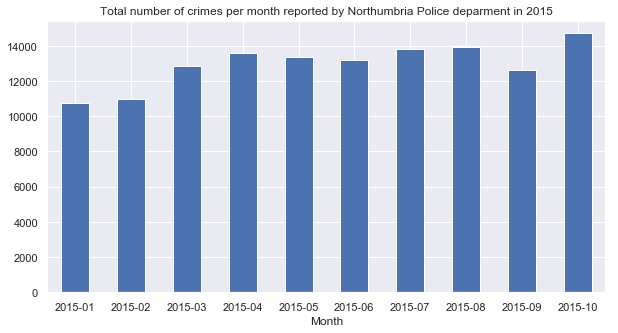

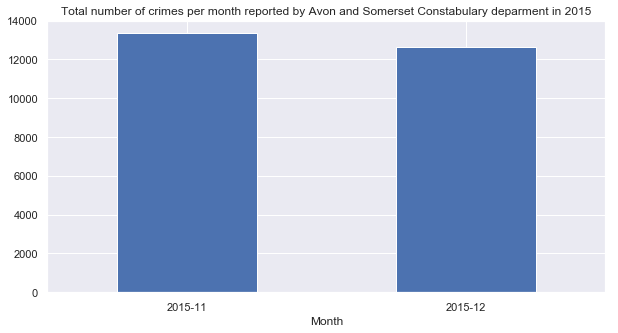

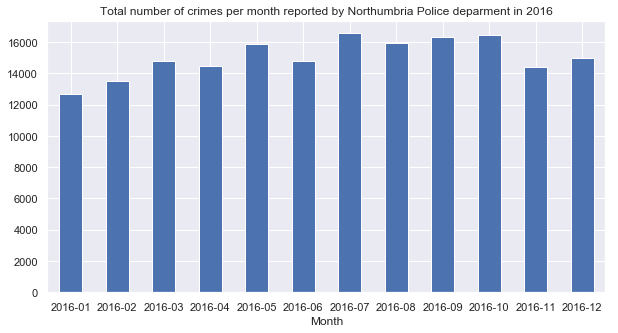

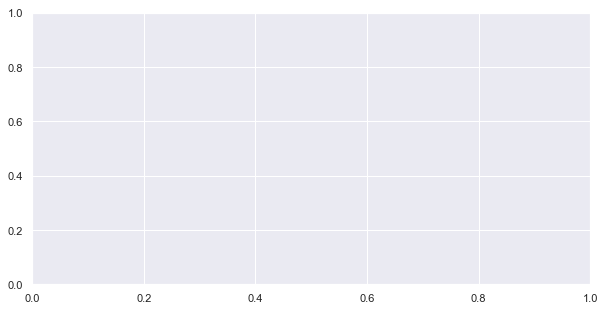

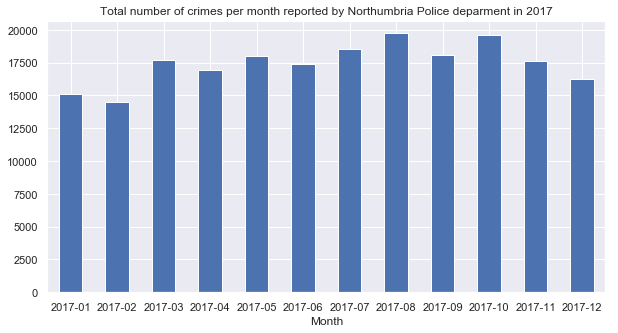

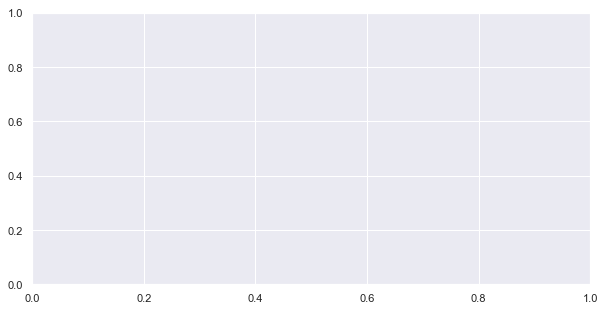

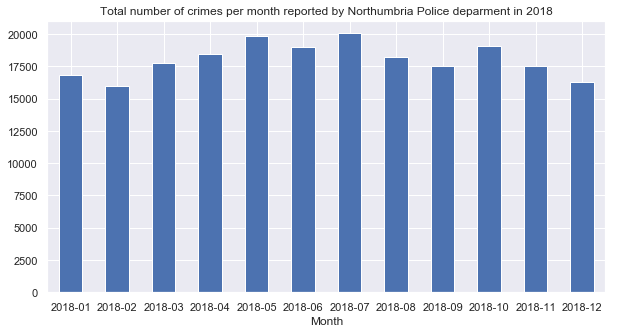

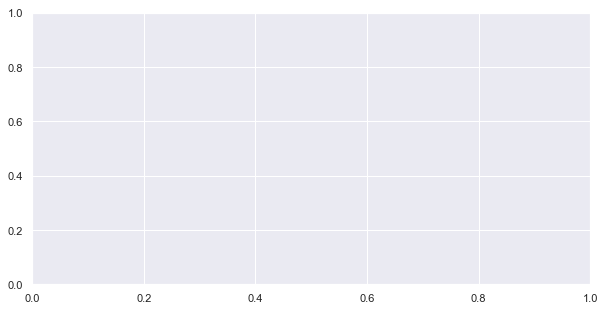

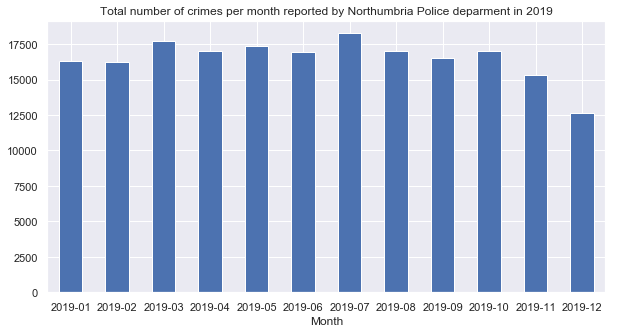

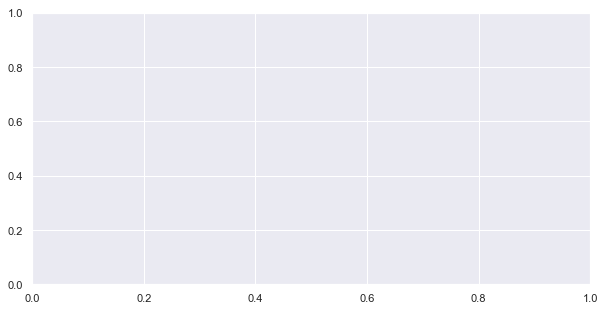

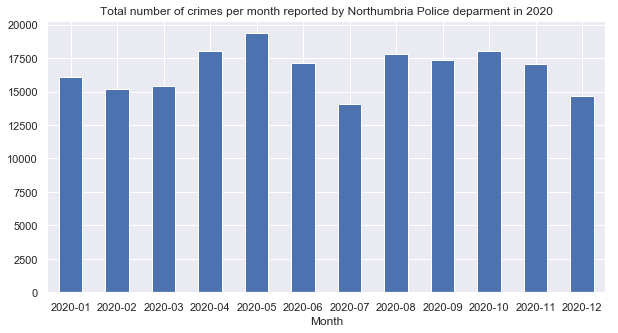

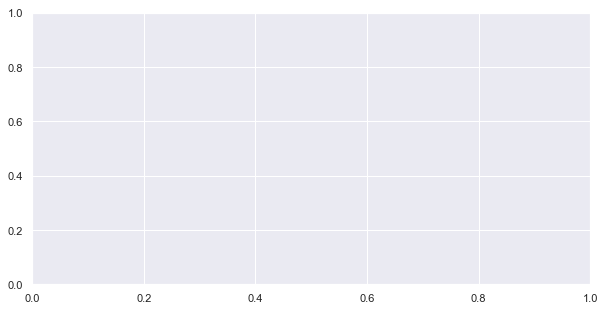

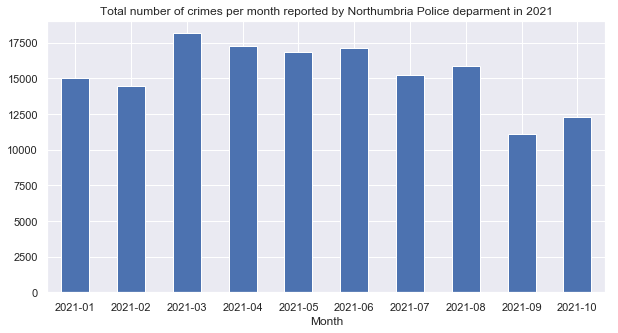

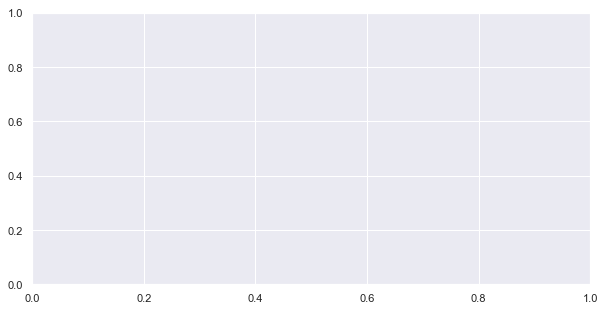

In [26]:
df = load_dataset("street", [regions_full[28]], start_year, 5, end_year,12)
print(df.groupby(["Reported by"]).size())

    
for year in range(start_year, end_year+1):
    departments = df['Reported by'].unique()
    for dep in departments:

            df_b = df[(df['Month'].str[0:4] == str(year)) & (df['Reported by'] == str(dep))]
            df_bar = df_b.groupby(["Month"]).size()
            fig, ax = plt.subplots(figsize=(10,5))
            if df_bar.empty:
                print('No Data reported by ' + str(dep) +' deparment in ' + str(year))
                #df_b = pd.DataFrame({'Month':['No Data'], 'val':[0]}),
                
                #ax_bar = df_b.plot.bar(x='Month', rot=0, ax=ax);
                #ax_bar.set_title('No data ' + str(dep) +' deparment in ' + str(year));

            else:

                ax_bar = df_bar.plot.bar(x='Month', rot=0, ax=ax);
                ax_bar.set_title('Total number of crimes per month reported by ' + str(dep) +' deparment in ' + str(year));
                

C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-staffordshire-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-staffordshire-street.csv not found
Reported by
Avon and Somerset Constabulary      9112
Staffordshire Police              895223
dtype: int64
No Data reported by Avon and Somerset Constabulary deparment in 2013
No Data reported by Avon and Somerset Constabulary deparment in 2014
No Data reported by Avon and Somerset Constabulary deparment in 2015
No Data reported by Avon and Somerset Constabulary deparment in 2017
No Data reported by Avon and Somerset Constabulary deparment in 2018
No Data reported by Avon and Somerset Constabulary deparment in 2019
No Data reported by Avon and Somerset Constabulary deparment in 2020
No Data reported by Avon and Somerset Constabulary deparment in 2021


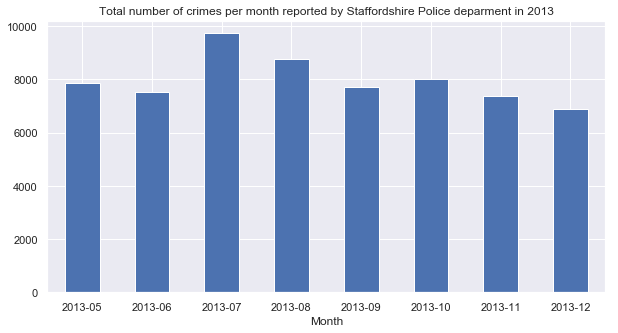

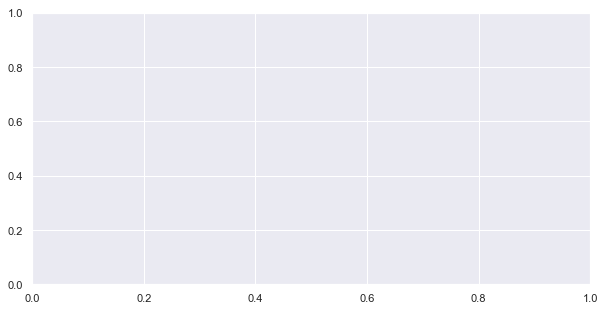

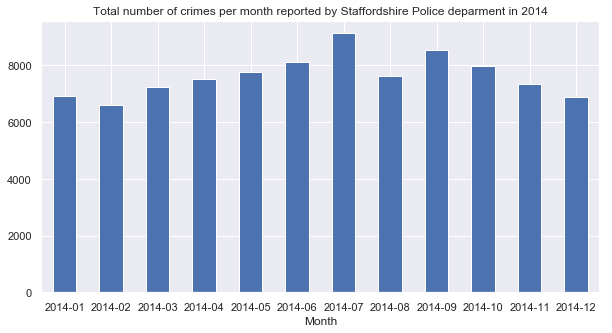

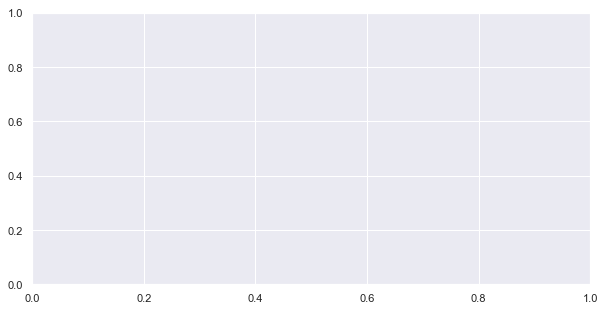

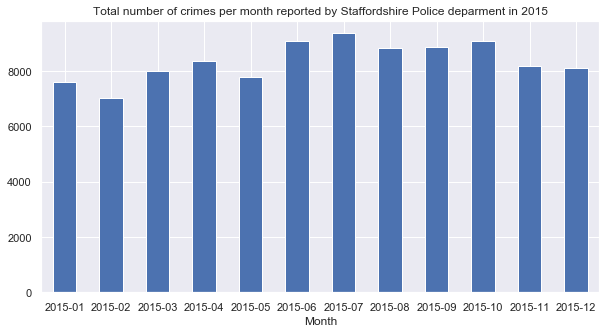

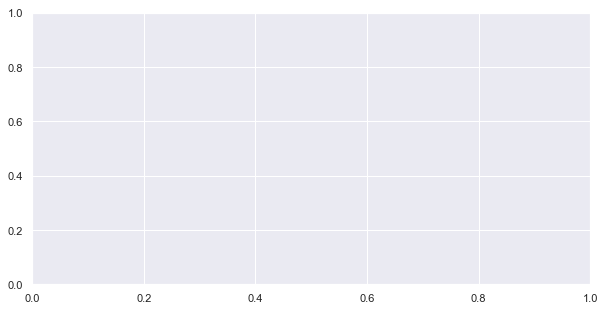

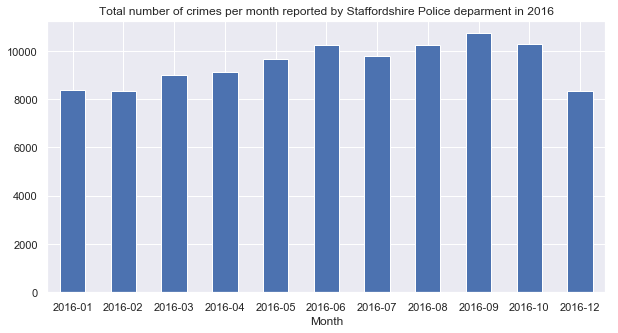

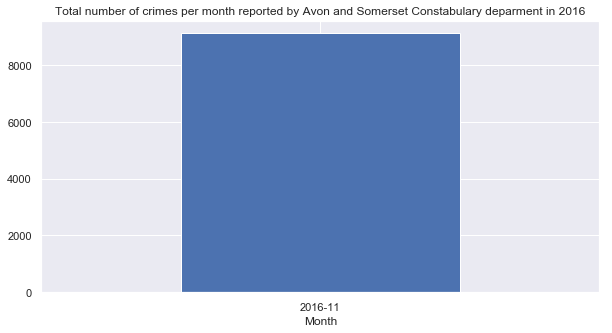

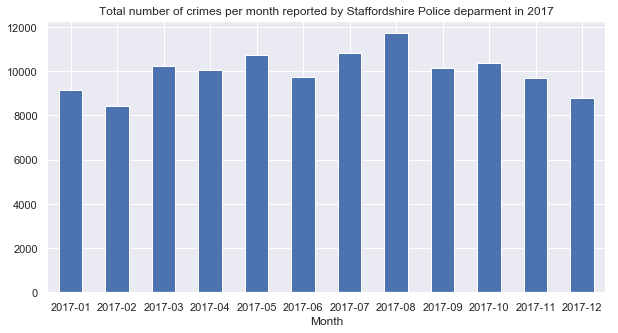

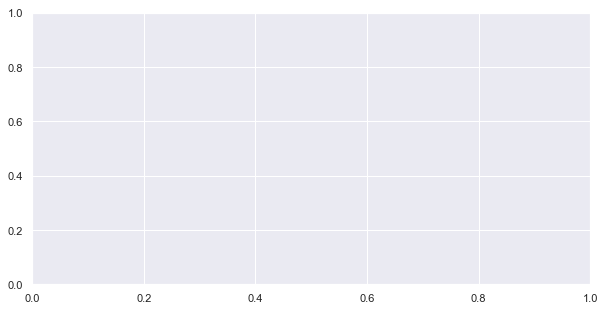

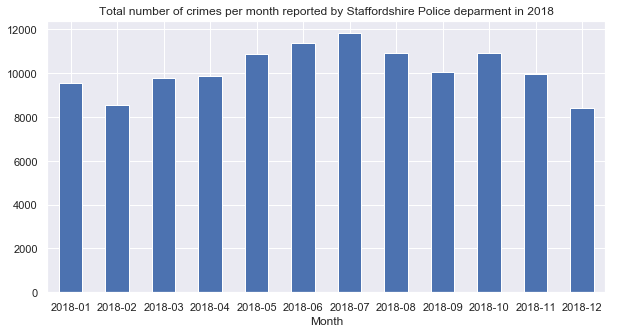

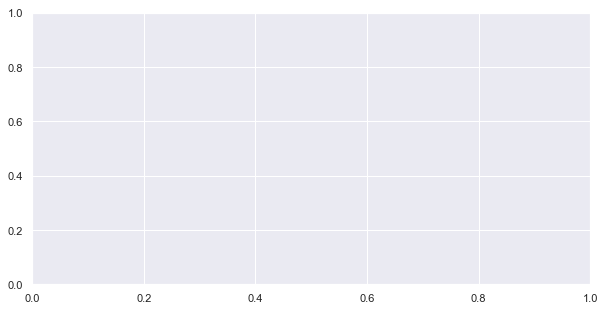

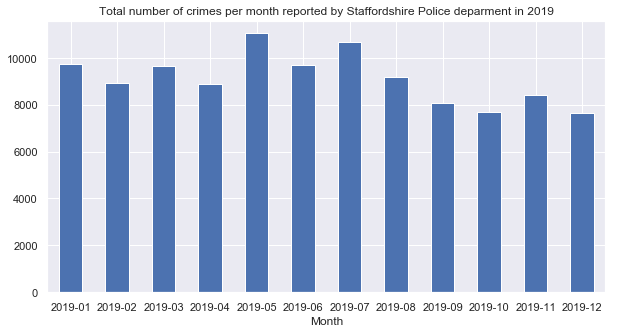

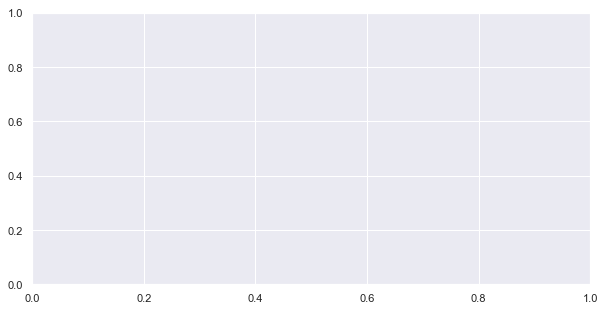

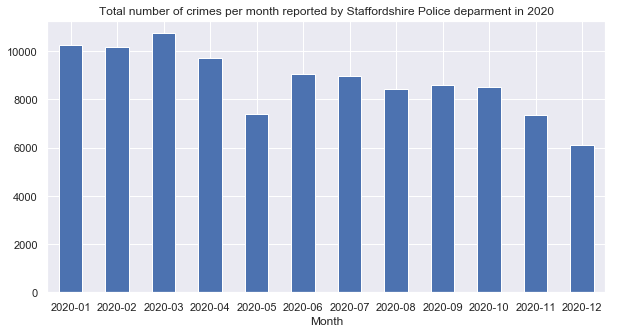

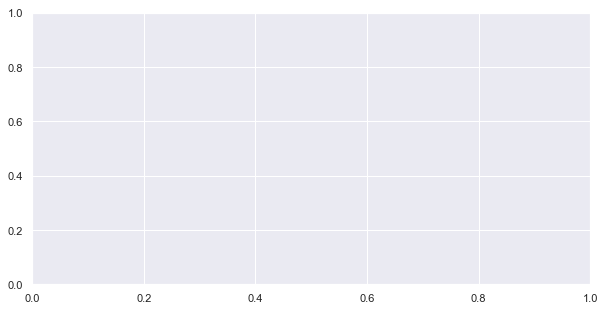

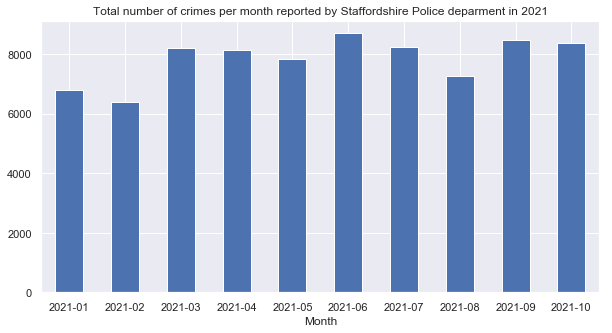

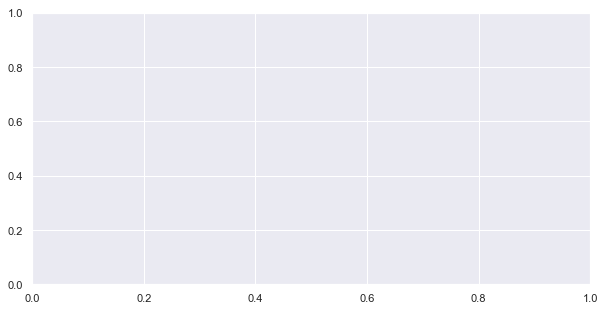

In [27]:
df = load_dataset("street", [regions_full[34]], start_year, 5, end_year,12)
print(df.groupby(["Reported by"]).size())

    
for year in range(start_year, end_year+1):
    departments = df['Reported by'].unique()
    for dep in departments:

            df_b = df[(df['Month'].str[0:4] == str(year)) & (df['Reported by'] == str(dep))]
            df_bar = df_b.groupby(["Month"]).size()
            fig, ax = plt.subplots(figsize=(10,5))
            if df_bar.empty:
                print('No Data reported by ' + str(dep) +' deparment in ' + str(year))
                #df_b = pd.DataFrame({'Month':['No Data'], 'val':[0]}),
                
                #ax_bar = df_b.plot.bar(x='Month', rot=0, ax=ax);
                #ax_bar.set_title('No data ' + str(dep) +' deparment in ' + str(year));

            else:

                ax_bar = df_bar.plot.bar(x='Month', rot=0, ax=ax);
                ax_bar.set_title('Total number of crimes per month reported by ' + str(dep) +' deparment in ' + str(year));


C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-surrey-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-surrey-street.csv not found
Reported by
Avon and Somerset Constabulary     34234
Surrey Police                     756088
dtype: int64
No Data reported by Avon and Somerset Constabulary deparment in 2013
No Data reported by Avon and Somerset Constabulary deparment in 2014
No Data reported by Avon and Somerset Constabulary deparment in 2017
No Data reported by Avon and Somerset Constabulary deparment in 2018
No Data reported by Avon and Somerset Constabulary deparment in 2019
No Data reported by Avon and Somerset Constabulary deparment in 2020
No Data reported by Avon and Somerset Constabulary deparment in 2021


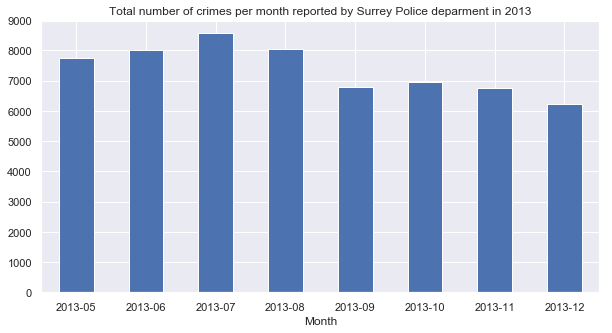

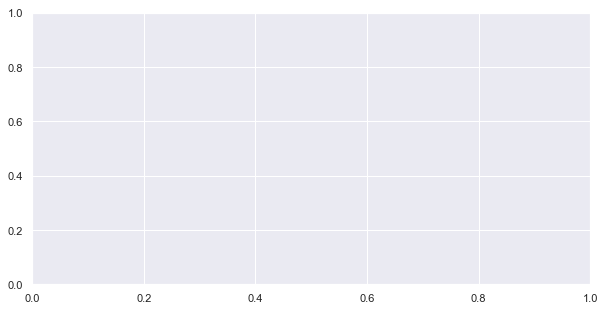

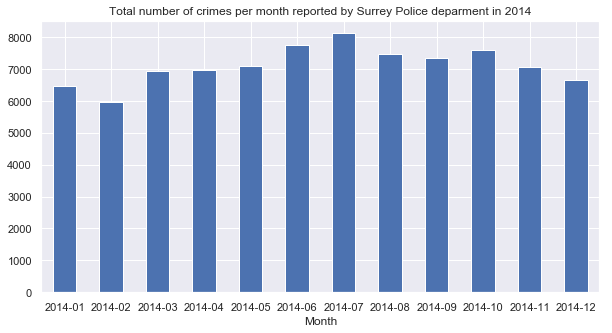

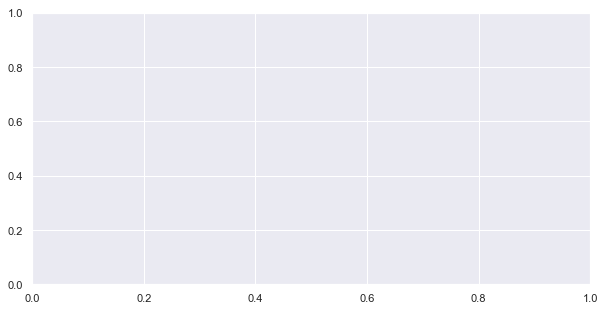

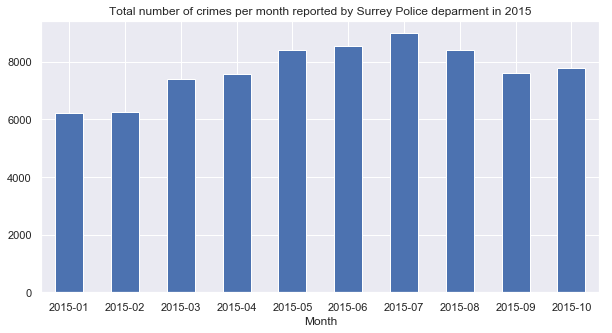

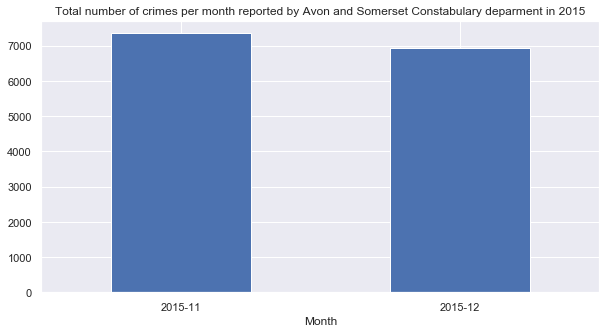

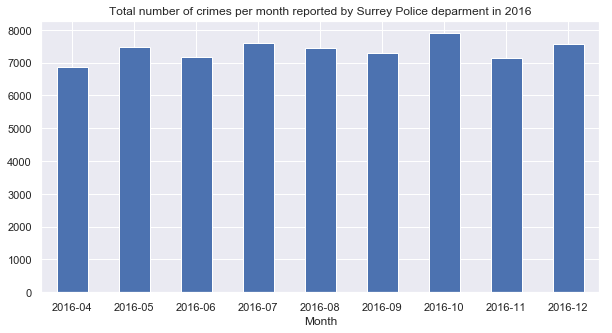

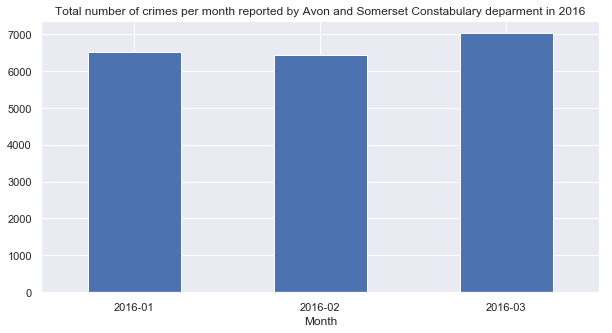

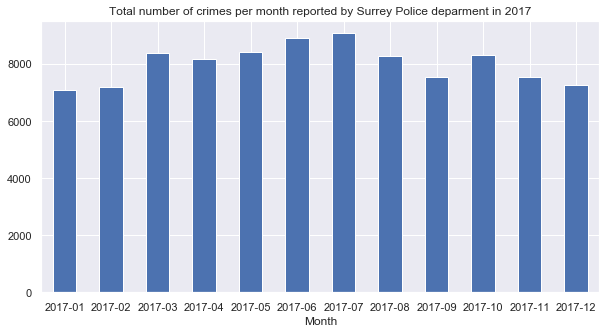

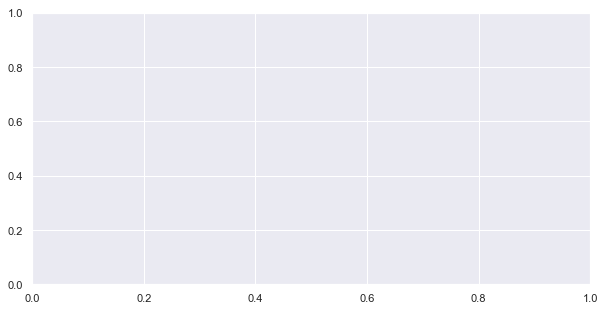

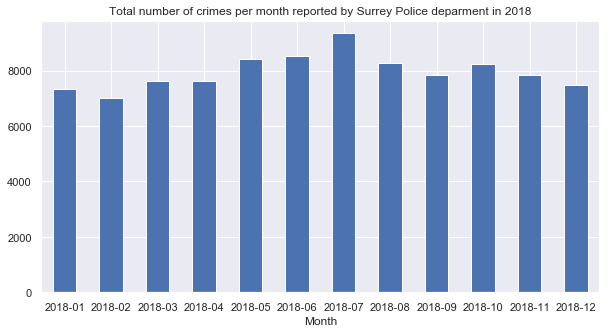

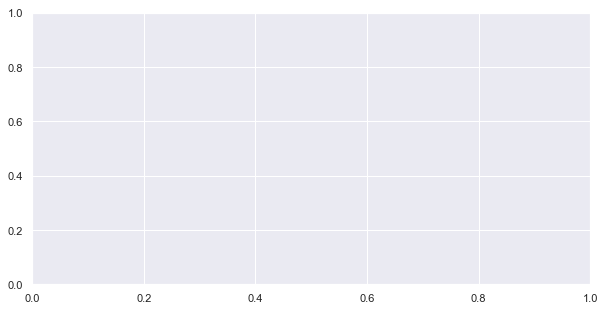

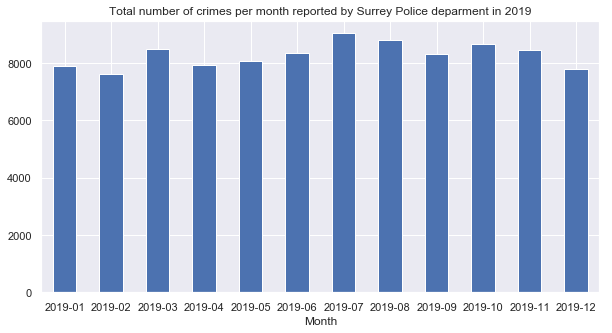

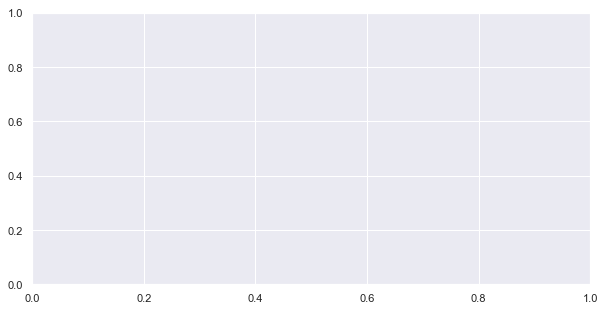

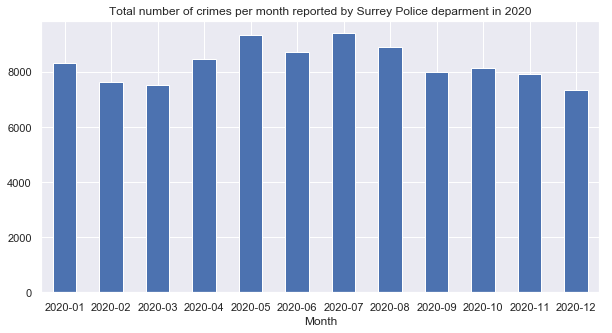

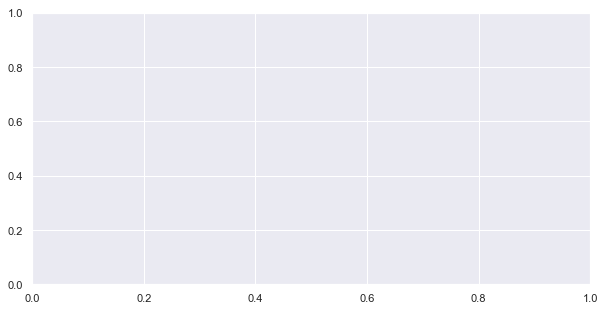

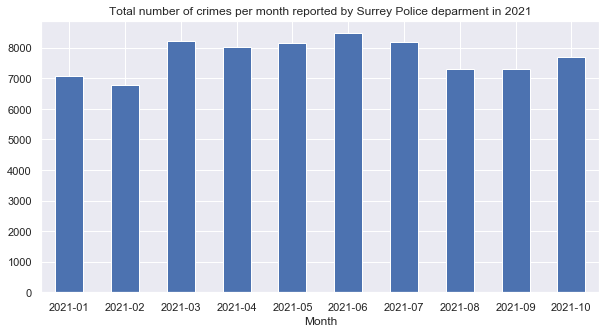

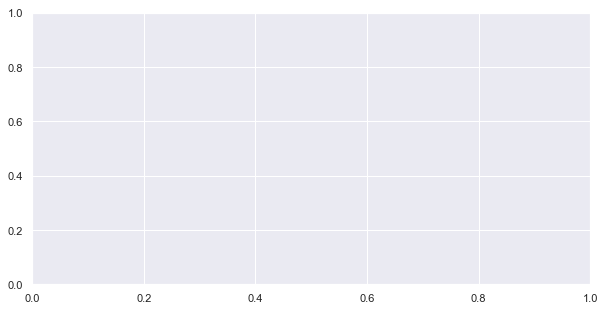

In [28]:
df = load_dataset("street", [regions_full[36]], start_year, 5, end_year,12)
print(df.groupby(["Reported by"]).size())

    
for year in range(start_year, end_year+1):
    departments = df['Reported by'].unique()
    for dep in departments:

            df_b = df[(df['Month'].str[0:4] == str(year)) & (df['Reported by'] == str(dep))]
            df_bar = df_b.groupby(["Month"]).size()
            fig, ax = plt.subplots(figsize=(10,5))
            if df_bar.empty:
                print('No Data reported by ' + str(dep) +' deparment in ' + str(year))
                #df_b = pd.DataFrame({'Month':['No Data'], 'val':[0]}),
                
                #ax_bar = df_b.plot.bar(x='Month', rot=0, ax=ax);
                #ax_bar.set_title('No data ' + str(dep) +' deparment in ' + str(year));

            else:

                ax_bar = df_bar.plot.bar(x='Month', rot=0, ax=ax);
                ax_bar.set_title('Total number of crimes per month reported by ' + str(dep) +' deparment in ' + str(year));
                

C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-warwickshire-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-warwickshire-street.csv not found
Reported by
Avon and Somerset Constabulary      4354
Warwickshire Police               437882
dtype: int64
No Data reported by Avon and Somerset Constabulary deparment in 2013
No Data reported by Avon and Somerset Constabulary deparment in 2014
No Data reported by Avon and Somerset Constabulary deparment in 2015
No Data reported by Avon and Somerset Constabulary deparment in 2017
No Data reported by Avon and Somerset Constabulary deparment in 2018
No Data reported by Avon and Somerset Constabulary deparment in 2019
No Data reported by Avon and Somerset Constabulary deparment in 2020
No Data reported by Avon and Somerset Constabulary deparment in 2021


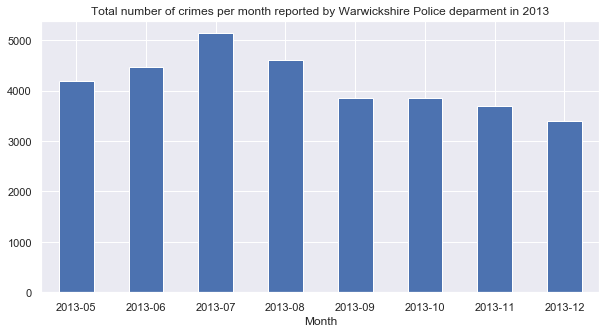

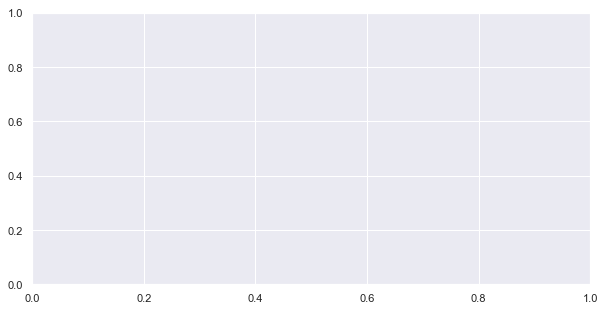

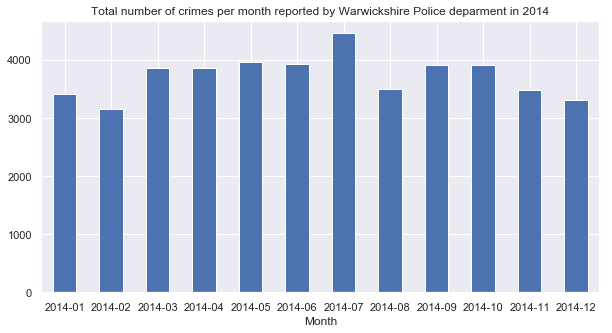

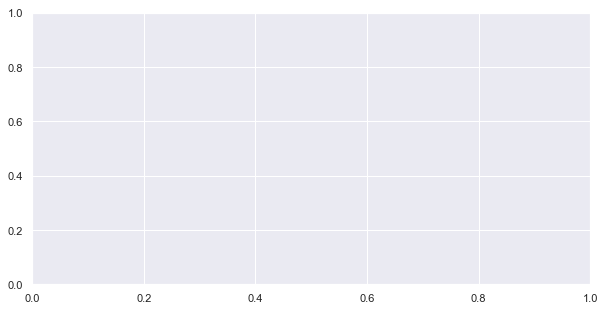

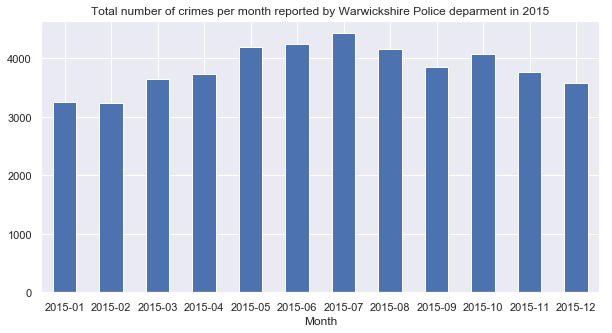

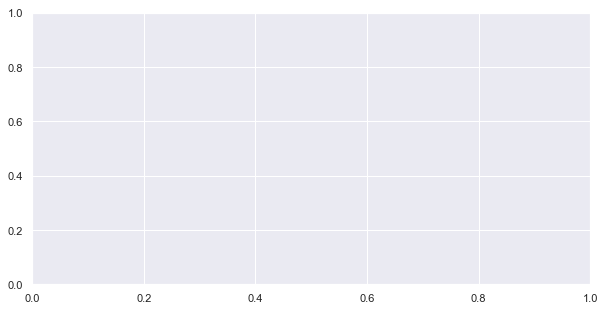

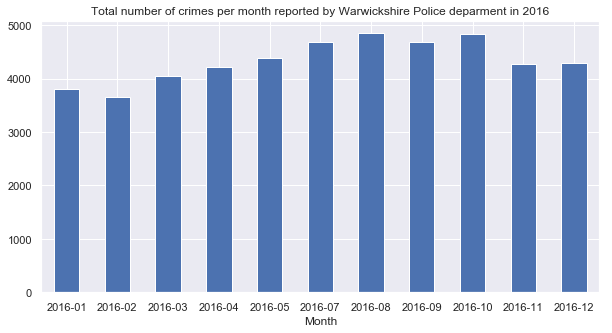

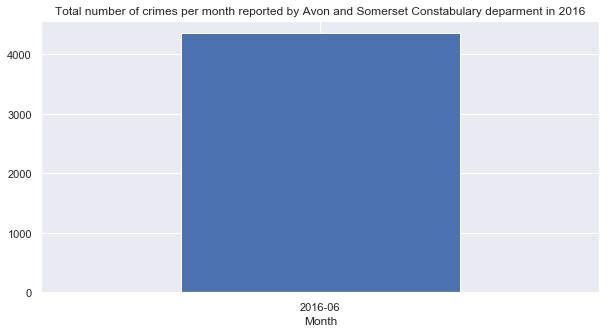

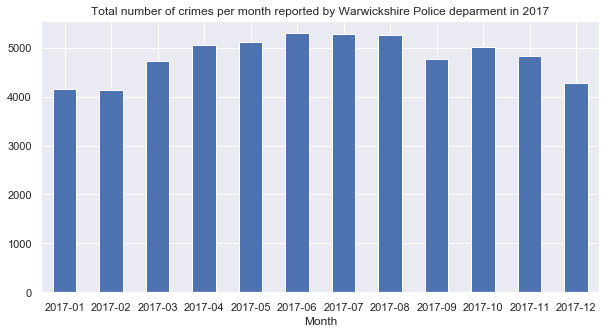

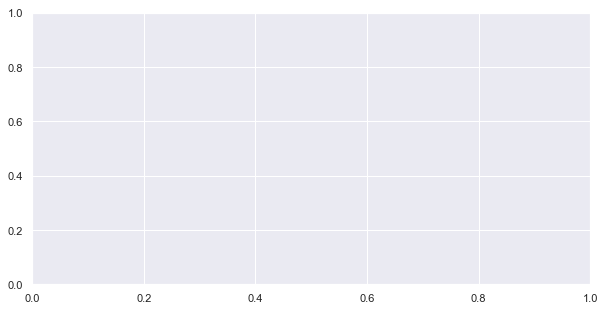

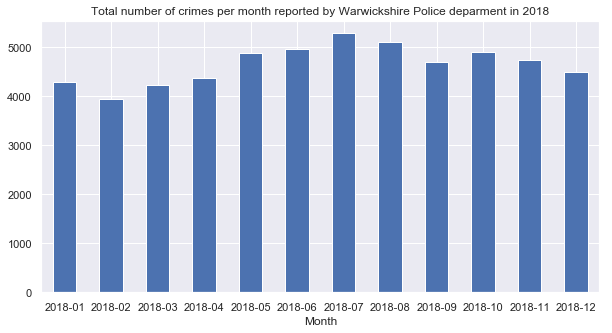

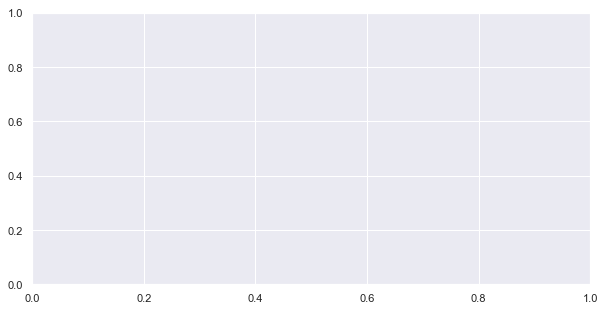

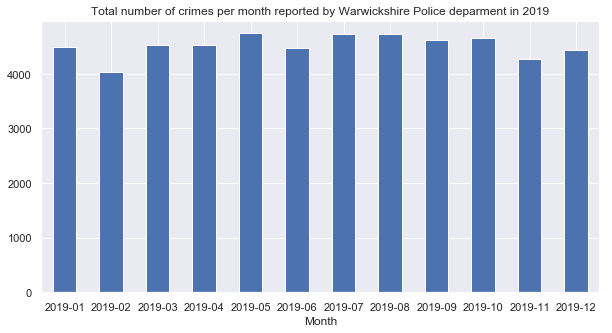

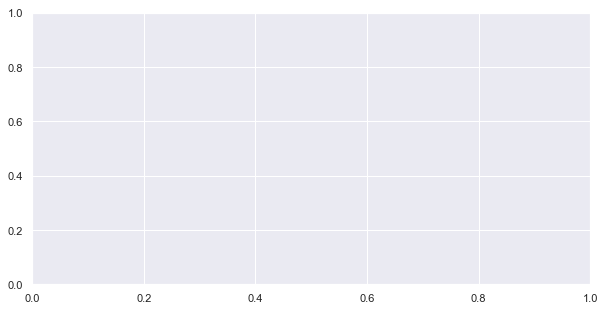

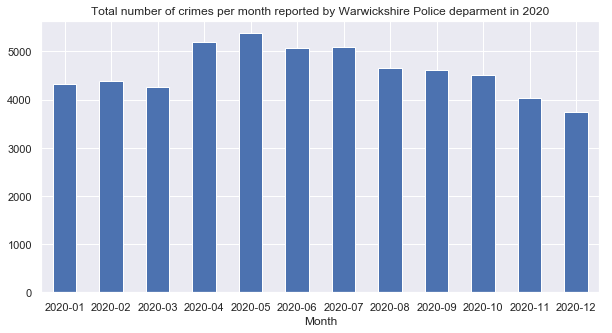

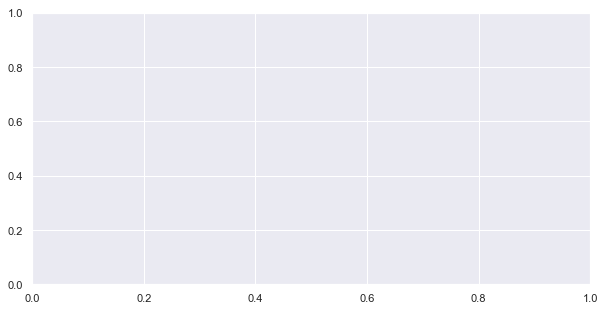

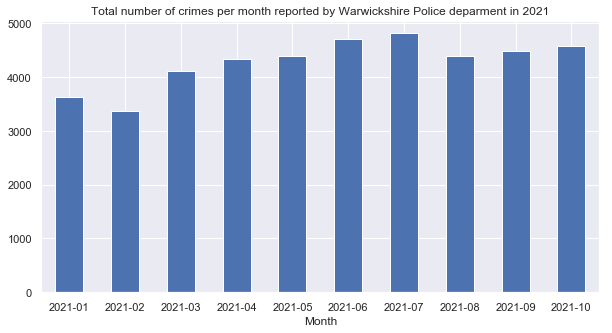

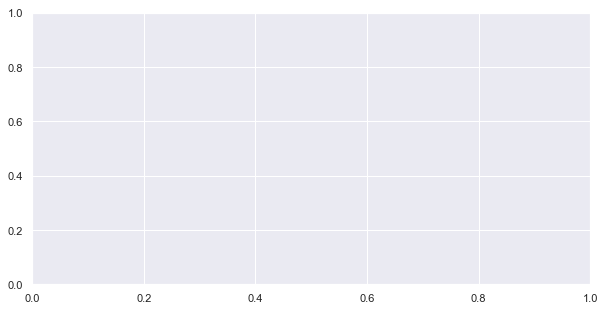

In [29]:
df = load_dataset("street", [regions_full[39]], start_year, 5, end_year,12)
print(df.groupby(["Reported by"]).size())

    
for year in range(start_year, end_year+1):
    departments = df['Reported by'].unique()
    for dep in departments:

            df_b = df[(df['Month'].str[0:4] == str(year)) & (df['Reported by'] == str(dep))]
            df_bar = df_b.groupby(["Month"]).size()
            fig, ax = plt.subplots(figsize=(10,5))
            if df_bar.empty:
                print('No Data reported by ' + str(dep) +' deparment in ' + str(year))
                #df_b = pd.DataFrame({'Month':['No Data'], 'val':[0]}),
                
                #ax_bar = df_b.plot.bar(x='Month', rot=0, ax=ax);
                #ax_bar.set_title('No data ' + str(dep) +' deparment in ' + str(year));

            else:

                ax_bar = df_bar.plot.bar(x='Month', rot=0, ax=ax);
                ax_bar.set_title('Total number of crimes per month reported by ' + str(dep) +' deparment in ' + str(year));
                

  

C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-11/2021-11-west-mercia-street.csv not found
C:\Users\20193308\Desktop\Data Expl\Jan_2010_Oct_2021/2021-12/2021-12-west-mercia-street.csv not found
Reported by
Avon and Somerset Constabulary     10634
West Mercia Police                961530
dtype: int64
No Data reported by Avon and Somerset Constabulary deparment in 2013
No Data reported by Avon and Somerset Constabulary deparment in 2014
No Data reported by Avon and Somerset Constabulary deparment in 2015
No Data reported by Avon and Somerset Constabulary deparment in 2017
No Data reported by Avon and Somerset Constabulary deparment in 2018
No Data reported by Avon and Somerset Constabulary deparment in 2019
No Data reported by Avon and Somerset Constabulary deparment in 2020
No Data reported by Avon and Somerset Constabulary deparment in 2021


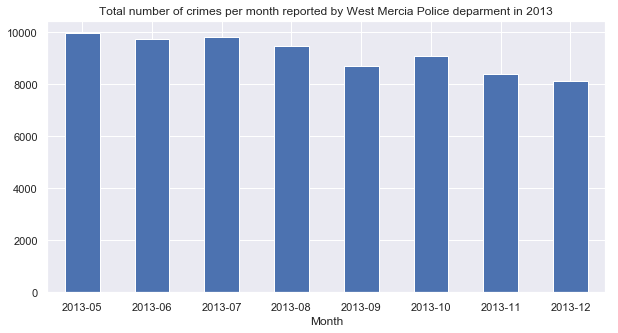

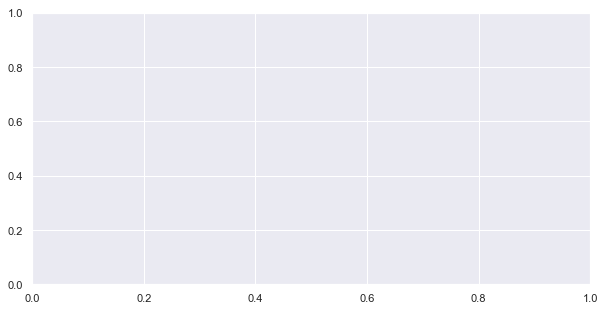

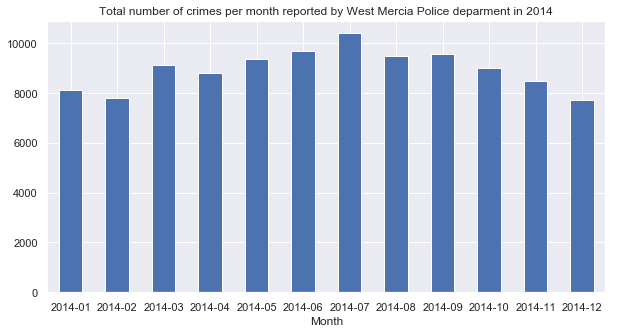

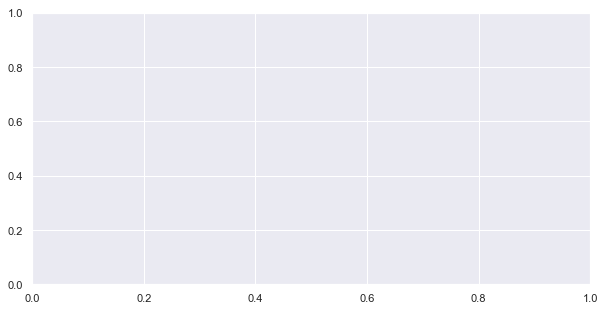

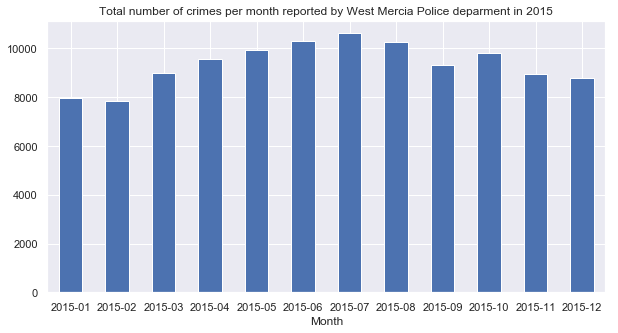

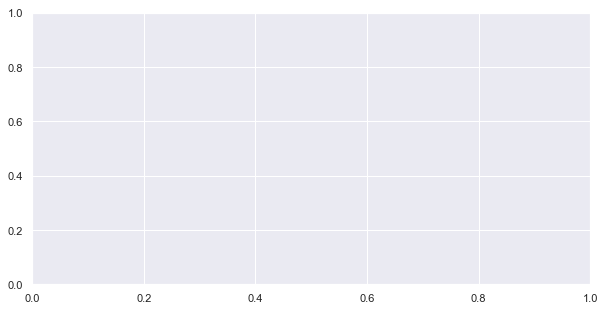

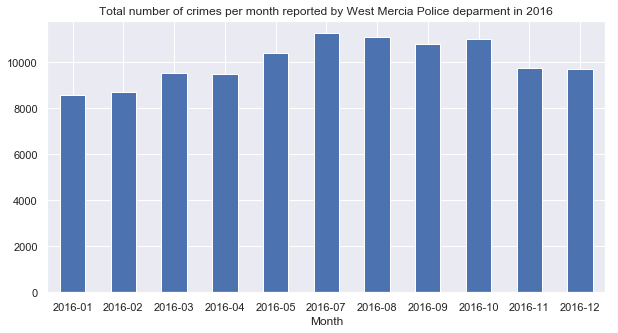

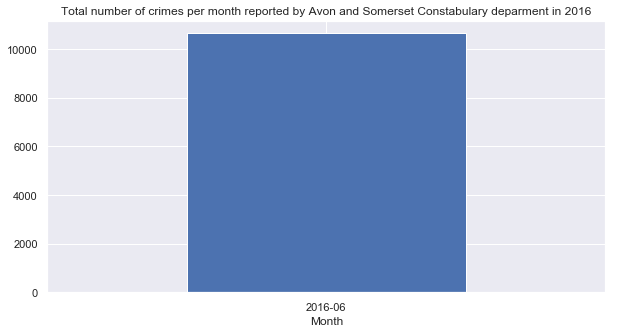

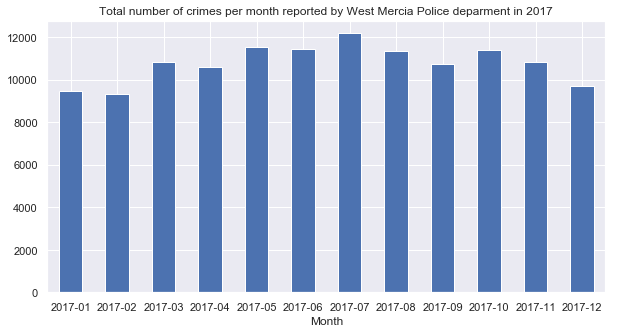

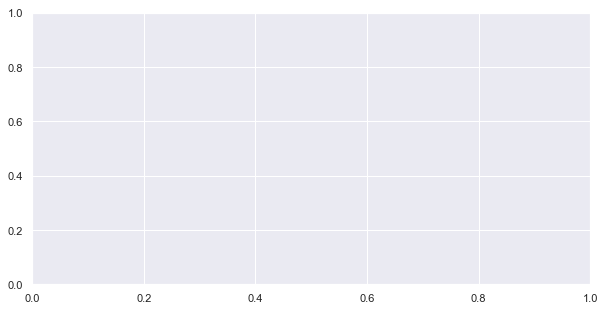

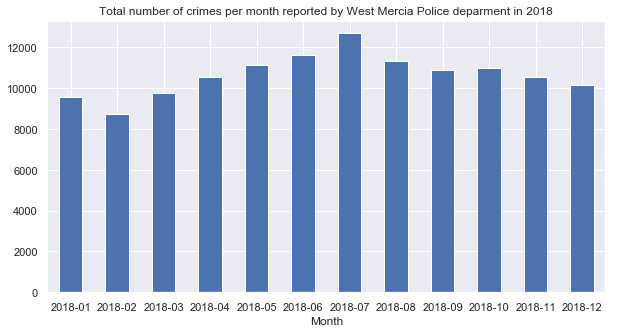

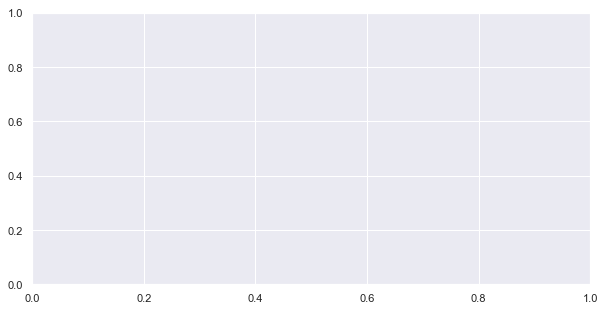

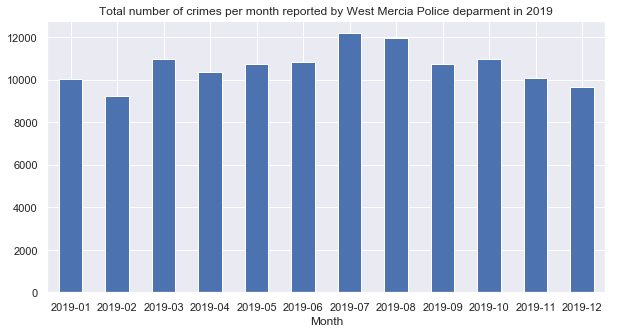

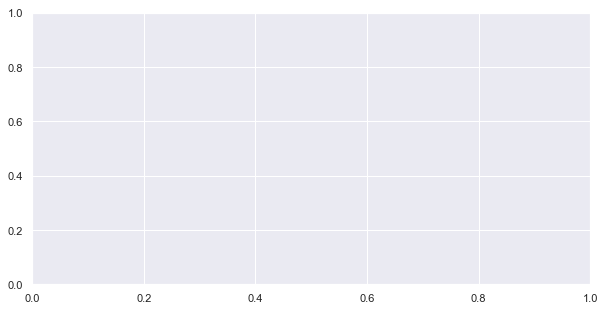

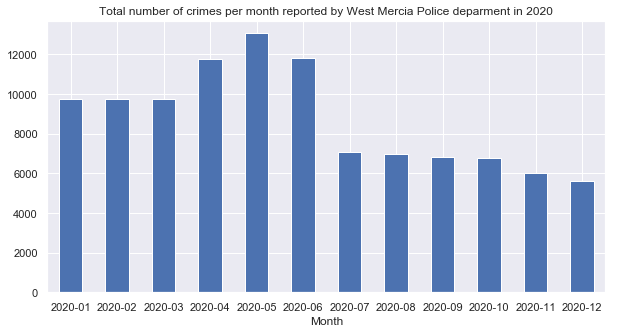

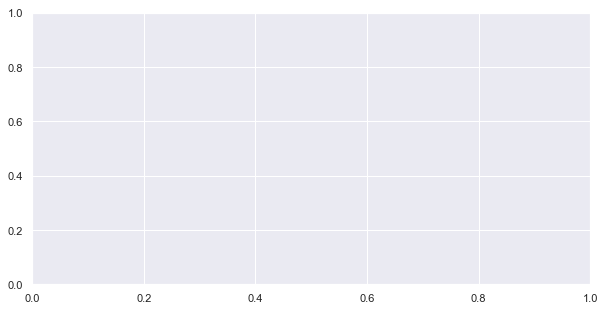

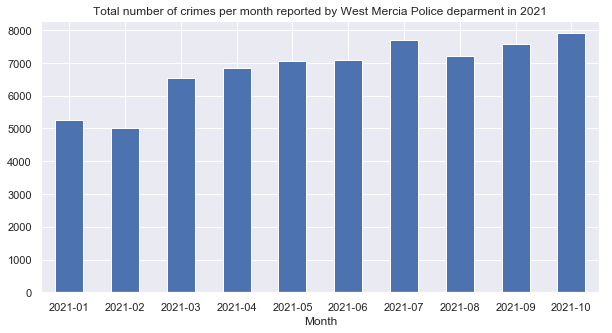

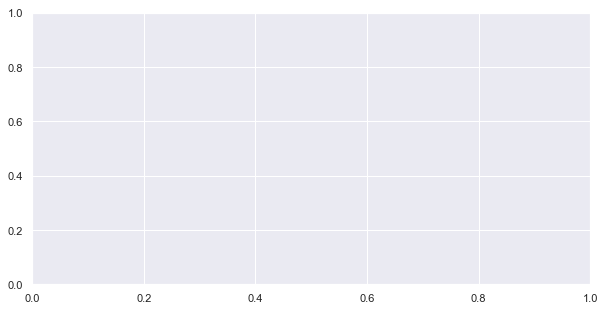

In [30]:
df = load_dataset("street", [regions_full[40]], start_year, 5, end_year,12)
print(df.groupby(["Reported by"]).size())

    
for year in range(start_year, end_year+1):
    departments = df['Reported by'].unique()
    for dep in departments:

            df_b = df[(df['Month'].str[0:4] == str(year)) & (df['Reported by'] == str(dep))]
            df_bar = df_b.groupby(["Month"]).size()
            fig, ax = plt.subplots(figsize=(10,5))
            if df_bar.empty:
                print('No Data reported by ' + str(dep) +' deparment in ' + str(year))
                #df_b = pd.DataFrame({'Month':['No Data'], 'val':[0]}),
                
                #ax_bar = df_b.plot.bar(x='Month', rot=0, ax=ax);
                #ax_bar.set_title('No data ' + str(dep) +' deparment in ' + str(year));

            else:

                ax_bar = df_bar.plot.bar(x='Month', rot=0, ax=ax);
                ax_bar.set_title('Total number of crimes per month reported by ' + str(dep) +' deparment in ' + str(year));
                

- Avon and Somerset Constabulary deparment does not provide much data
- West Mercia Police Department in 2020 huge drop in 07